In [3]:
import pandas as pd
import collections
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

In [4]:
# The data frame is called house_info
raw_info = pd.read_csv("kc_house_data.csv",error_bad_lines=False)

In [5]:
raw_info

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [6]:
house_info = pd.DataFrame({'Bedrooms':raw_info.bedrooms, 'Bathrooms':raw_info.bathrooms, 'Floors':raw_info.floors, 
                           'Year Built':raw_info.yr_built, 'Year Renoveted':raw_info.yr_renovated,
                           'Size of Basement':raw_info.sqft_basement,'Condition':raw_info.condition,
                          'Size of Above':raw_info.sqft_above,'Location':raw_info.zipcode,
                          'Price':raw_info.price})

In [7]:
house_info

,Bedrooms,Bathrooms,Floors,Year Built,Year Renoveted,Size of Basement,Condition,Size of Above,Location,Price
0,3,1.00,1.0,1955,0.0,0.0,3,1180,98178,221900.0
1,3,2.25,2.0,1951,1991.0,400.0,3,2170,98125,538000.0
2,2,1.00,1.0,1933,NaN,0.0,3,770,98028,180000.0
3,4,3.00,1.0,1965,0.0,910.0,5,1050,98136,604000.0
4,3,2.00,1.0,1987,0.0,0.0,3,1680,98074,510000.0
...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,2009,0.0,0.0,3,1530,98103,360000.0
21593,4,2.50,2.0,2014,0.0,0.0,3,2310,98146,400000.0
21594,2,0.75,2.0,2009,0.0,0.0,3,1020,98144,402101.0
21595,3,2.50,2.0,2004,0.0,0.0,3,1600,98027,400000.0


In [8]:
house_info.describe()

,Bedrooms,Bathrooms,Floors,Year Built,Year Renoveted,Condition,Size of Above,Location,Price
count,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,1.494096,1970.999676,83.636778,3.409825,1788.596842,98077.951845,5.402966e+05
std,0.926299,0.768984,0.539683,29.375234,399.946414,0.650546,827.759761,53.513072,3.673681e+05
min,1.000000,0.500000,1.000000,1900.000000,0.000000,1.000000,370.000000,98001.000000,7.800000e+04
25%,3.000000,1.750000,1.000000,1951.000000,0.000000,3.000000,1190.000000,98033.000000,3.220000e+05
50%,3.000000,2.250000,1.500000,1975.000000,0.000000,3.000000,1560.000000,98065.000000,4.500000e+05
75%,4.000000,2.500000,2.000000,1997.000000,0.000000,4.000000,2210.000000,98118.000000,6.450000e+05
max,33.000000,8.000000,3.500000,2015.000000,2015.000000,5.000000,9410.000000,98199.000000,7.700000e+06


In [9]:
def PRICE_BEDROOM(AMOUNT_BEDROOM):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bedrooms"].tolist()
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])
    
    bedrooms_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedrooms_index.append(i)
    len(bedrooms_index)

    bedrooms_westking = []
    for i in bedrooms_index:
        if locations[i] == zip_loca[0] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[1] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[2] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[3] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[4]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[5] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[6] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[7]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[8] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[9] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[10] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[11] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[12]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[13] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[14] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[15] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[16]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[17] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[18]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[19] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[20]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[21] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[22] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[23] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[24] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[25] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[26] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[27] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[28]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[29] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[30] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[31]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[32] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[33] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[34] : bedrooms_westking.append(i)
        
    price = house_info["Price"].tolist()

    price_westking = []
    for i in bedrooms_westking:price_westking.append(price[i])
    return(price_westking)

no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
price_bedrooms_westking = []
for i in no_of_bedrooms:
    price_bedrooms_westking.append(PRICE_BEDROOM(i))
price_bedrooms_westking= sum(price_bedrooms_westking, [])
len(price_bedrooms_westking)

5816

In [10]:
def AMOUNT_BEDROOMS(AMOUNT_BEDROOM):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bedrooms"].tolist()
    X_value = []
    bedroom_index = []
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])
        
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedroom_index.append(i)

    for i in bedroom_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_BEDROOM)
    
    
    
    return X_value
no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
amount_bedrooms_westking = []
for i in no_of_bedrooms:
    amount_bedrooms_westking.append(AMOUNT_BEDROOMS(i))
amount_bedrooms_westking= sum(amount_bedrooms_westking, [])
len(amount_bedrooms_westking)

5816

In [11]:
regressiondata1 = pd.DataFrame({'Amount_of_Bedrooms':amount_bedrooms_westking,
                                'Price':price_bedrooms_westking})
#regressiondata1 = regressiondata1.drop(3830)
regressiondata1

,Amount_of_Bedrooms,Price
0,3,221900.0
1,3,510000.0
2,3,229500.0
3,3,400000.0
4,3,667000.0
...,...,...
5811,8,680000.0
5812,8,1970000.0
5813,8,3300000.0
5814,9,450000.0


<ipython-input-12-02389451dce1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million',


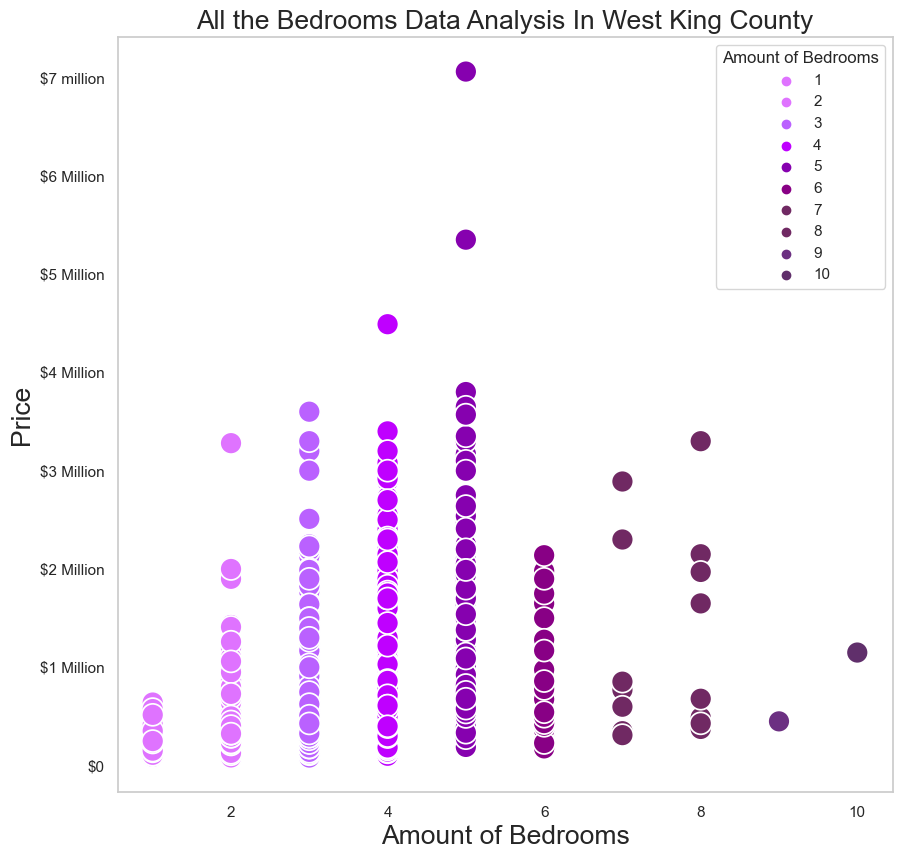

In [12]:
x = regressiondata1['Amount_of_Bedrooms']
y = regressiondata1['Price']
sns.set(style='whitegrid')
flatui = ['#df73ff','#df73ff','#ba61ff','#bf00ff','#8601af','#880085','#702963','#702963',
          '#6c3082','#602f6b']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata1, x=x, y=y,s=250,hue='Amount_of_Bedrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bedrooms Data Analysis In West King County',size=19)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Bedrooms')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million',
                    '$6 Million','$7 million'])
plt.show()

In [13]:
train_df, test_df = train_test_split(regressiondata1, test_size=0.10, shuffle=False)

In [14]:
X_train, y_train = train_df[['Amount_of_Bedrooms']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Bedrooms']], test_df[['Price']]

In [15]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [16]:
Quantile_regression = pd.DataFrame({'Amount_of_Bedrooms': X_test.reset_index()['Amount_of_Bedrooms'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [17]:
Quantile_regression[500:]

,Amount_of_Bedrooms,0.1,0.5,0.9,Price
500,6,283998.862974,630994.860369,1.771976e+06,780000.0
501,6,283998.862974,630994.860369,1.771976e+06,859950.0
502,6,283998.862974,630994.860369,1.771976e+06,1280000.0
503,6,283998.862974,630994.860369,1.771976e+06,1170000.0
504,1,175001.723835,310003.386578,6.000073e+05,245000.0
...,...,...,...,...,...
577,8,283998.862974,630994.860369,1.771976e+06,680000.0
578,8,283998.862974,630994.860369,1.771976e+06,1970000.0
579,8,283998.862974,630994.860369,1.771976e+06,3300000.0
580,9,283998.862974,630994.860369,1.771976e+06,450000.0


In [18]:
melted_data = pd.melt(Quantile_regression, id_vars=['Amount_of_Bedrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.drop(range(1746,2328))

In [19]:
melted_data

,Amount_of_Bedrooms,variable,value
0,5,0.1,2.839989e+05
1,5,0.1,2.839989e+05
2,5,0.1,2.839989e+05
3,5,0.1,2.839989e+05
4,5,0.1,2.839989e+05
...,...,...,...
1741,8,0.9,1.771976e+06
1742,8,0.9,1.771976e+06
1743,8,0.9,1.771976e+06
1744,9,0.9,1.771976e+06


In [20]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Bedrooms':[1,2,3,4,5,6,7,8,9,10],
    '0.1':[175001.723835,175001.723835,175001.723835,283998.862974,
           283998.862974,283998.862974,283998.862974,283998.862974,283998.862974,283998.862974],
'0.5':[310003.386578,310003.386578,310003.386578,630994.860369,630994.860369,630994.860369,
       630994.860369,630994.860369,630994.860369,630994.860369],
'0.9':[6.000073e+05,6.000073e+05,6.000073e+05,1.771976e+06,1.771976e+06,1.771976e+06,1.771976e+06,
      1.771976e+06,1.771976e+06,1.771976e+06]})
Quantileregression_updated


,Amount_of_Bedrooms,0.1,0.5,0.9
0,1,175001.723835,310003.386578,600007.3
1,2,175001.723835,310003.386578,600007.3
2,3,175001.723835,310003.386578,600007.3
3,4,283998.862974,630994.860369,1771976.0
4,5,283998.862974,630994.860369,1771976.0
5,6,283998.862974,630994.860369,1771976.0
6,7,283998.862974,630994.860369,1771976.0
7,8,283998.862974,630994.860369,1771976.0
8,9,283998.862974,630994.860369,1771976.0
9,10,283998.862974,630994.860369,1771976.0


In [21]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Bedrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data


,Amount_of_Bedrooms,Percentile,value
0,1,0.1,1.750017e+05
1,2,0.1,1.750017e+05
2,3,0.1,1.750017e+05
3,4,0.1,2.839989e+05
4,5,0.1,2.839989e+05
5,6,0.1,2.839989e+05
6,7,0.1,2.839989e+05
7,8,0.1,2.839989e+05
8,9,0.1,2.839989e+05
9,10,0.1,2.839989e+05


<ipython-input-22-02ecfce71903>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$600,000',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$600,000'),
 Text(0, 1200000.0, '$1 Million'),
 Text(0, 1400000.0, '$1.2 Million'),
 Text(0, 1600000.0, '$1.4 Million'),
 Text(0, 1800000.0, '$1.6 Million'),
 Text(0, 2000000.0, '$1.8 Million')]

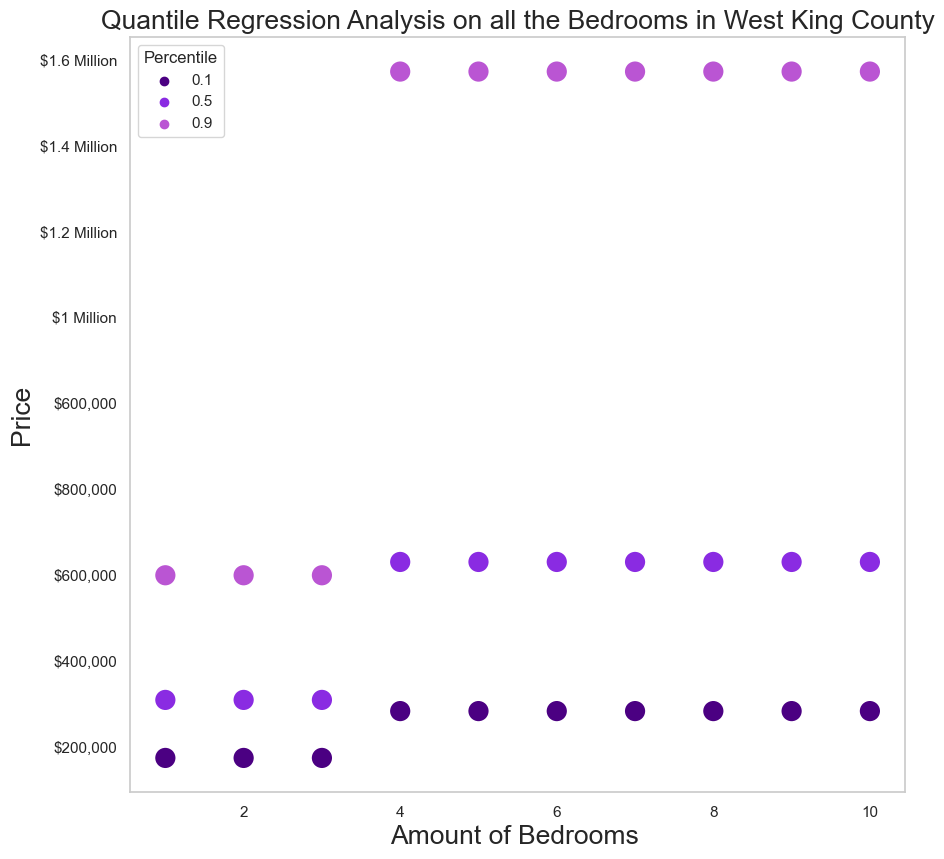

In [22]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax = sns.scatterplot(data=melted_data, x="Amount_of_Bedrooms", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
plt.gcf().set_size_inches((10,10))
ax.set_title('Quantile Regression Analysis on all the Bedrooms in West King County',size=19)
plt.xlabel("Amount of Bedrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$600,000',
'$1 Million','$1.2 Million','$1.4 Million','$1.6 Million','$1.8 Million'])

<ipython-input-23-6ebcf216455c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$600,000',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$600,000'),
 Text(0, 1200000.0, '$1 Million'),
 Text(0, 1400000.0, '$1.2 Million'),
 Text(0, 1600000.0, '$1.4 Million'),
 Text(0, 1800000.0, '$1.6 Million'),
 Text(0, 2000000.0, '$1.8 Million')]

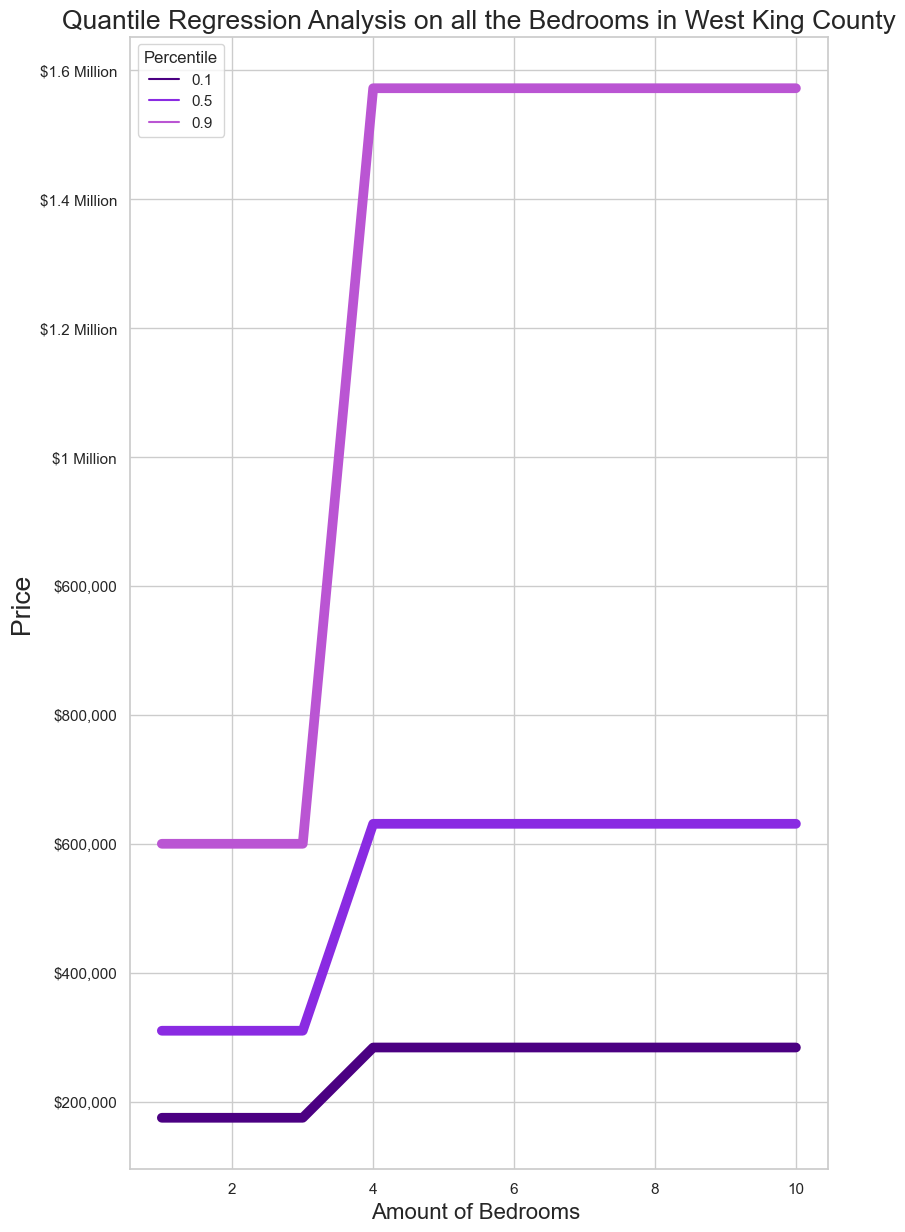

In [23]:
sns.set_style("whitegrid")
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax=sns.lineplot( data=melted_data, x="Amount_of_Bedrooms",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Bedrooms in West King County',size=19)
plt.xlabel("Amount of Bedrooms ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$600,000',
'$1 Million','$1.2 Million','$1.4 Million','$1.6 Million','$1.8 Million'])

In [24]:
(Quantile_regression['Price'] > Quantile_regression['0.1']).value_counts()

True     544
False     38
dtype: int64

In [25]:
i = 0
y= 0
x = []
while i < 544:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 38:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [26]:
(Quantile_regression['Price'] > Quantile_regression['0.5']).value_counts()

False    307
True     275
dtype: int64

In [27]:
i = 0
y= 0
x = []
while i < 307:
    x.append('How Many Times The Predictionwas Was Right')
    i+=1
while y < 275:
    x.append('How Many Times The Predictionwas Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [28]:
(Quantile_regression['Price'] > Quantile_regression['0.9']).value_counts()

False    537
True      45
dtype: int64

In [29]:
i = 0
y= 0
x = []
while i < 537:
    x.append('How Many Times The Predictionwas Was Right')
    i+=1
while y < 45:
    x.append('How Many Times The Predictionwas Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

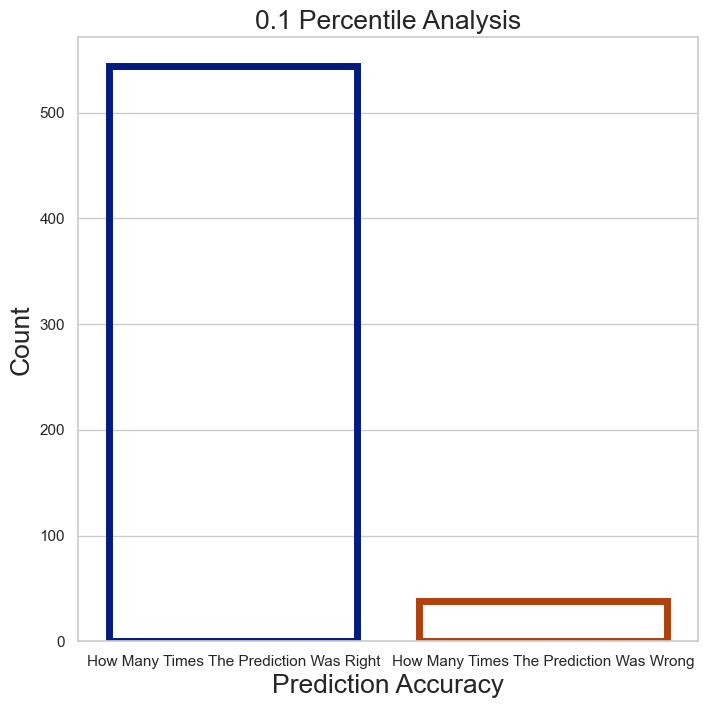

In [30]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

Text(0, 0.5, 'Count')

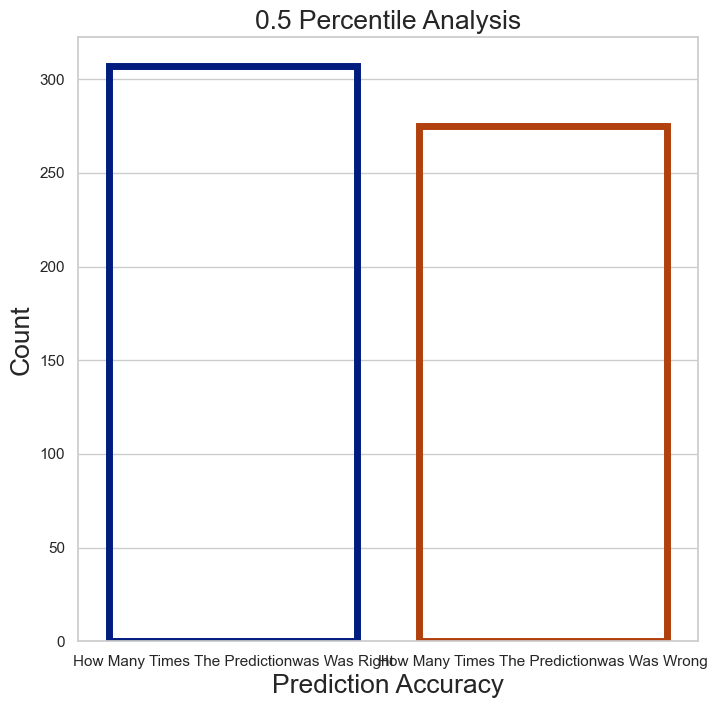

In [31]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

Text(0, 0.5, 'Count')

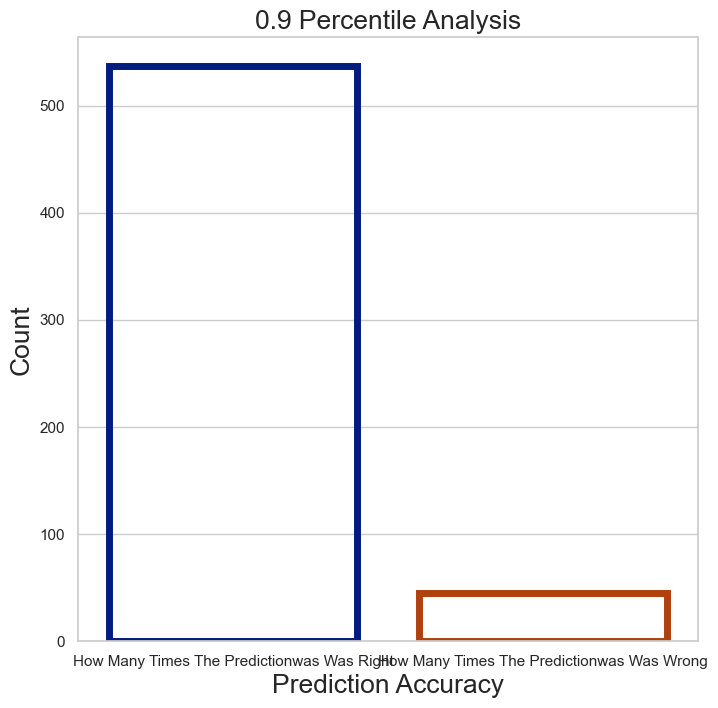

In [32]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [33]:
Predictions = []
for i in regressiondata1.Amount_of_Bedrooms:
    if i == 1:Predictions.append('Between: $175,001 - $600,007')
    if i == 2: Predictions.append('Between: $175,001 - $600,007')
    if i == 3:Predictions.append('Between: $175,001 - $600,007')
    if i == 4:Predictions.append('Between: $283,998 - $1,771,976') 
    if i == 5:Predictions.append('Between: $283,998 - $1,771,976')
    if i == 6:Predictions.append('Between: $283,998 - $1,771,976')
    if i == 7:Predictions.append('Between: $283,998 - $1,771,976')
    if i == 8:Predictions.append('Between: $283,998 - $1,771,976')
    if i == 9:Predictions.append('Between: $283,998 - $1,771,976')
    if i == 10:Predictions.append('Between: $283,998 - $1,771,976')
len(Predictions)

5816

In [34]:
price = []
for i in regressiondata1.Price:
    price.append("${:,.0f}".format(i))

In [35]:
Prediction = pd.DataFrame({'Amount of Bedrooms':regressiondata1.Amount_of_Bedrooms,
                           'Prediction':Predictions,'Actual Price':price})
Prediction

,Amount of Bedrooms,Prediction,Actual Price
0,3,"Between: $175,001 - $600,007","$221,900"
1,3,"Between: $175,001 - $600,007","$510,000"
2,3,"Between: $175,001 - $600,007","$229,500"
3,3,"Between: $175,001 - $600,007","$400,000"
4,3,"Between: $175,001 - $600,007","$667,000"
...,...,...,...
5811,8,"Between: $283,998 - $1,771,976","$680,000"
5812,8,"Between: $283,998 - $1,771,976","$1,970,000"
5813,8,"Between: $283,998 - $1,771,976","$3,300,000"
5814,9,"Between: $283,998 - $1,771,976","$450,000"


In [36]:
def AMOUNT_BATHROOMS(AMOUNT_BATHROOM):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bathrooms"].tolist()
    X_value = []
    bathroom_index = []
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])
        
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)

    for i in bathroom_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_BATHROOM)
    
    return X_value
no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
amount_bathrooms_westking = []
for i in no_of_bathrooms:
    amount_bathrooms_westking.append(AMOUNT_BATHROOMS(i))
amount_bathrooms_westking= sum(amount_bathrooms_westking, [])
len(amount_bathrooms_westking)

5816

In [37]:
def PRICE_BATHROOM(AMOUNT_BATHROOM):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bath = house_info["Bathrooms"].tolist()

    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])
        
    bathroom_index = []
    for i,x in enumerate(amount_bath):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)
    len(bathroom_index)

    bathroom_westking = []
    for i in bathroom_index:
        if locations[i] == zip_loca[0] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[1] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[2] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[3] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[4]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[5] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[6] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[7]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[8] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[9] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[10] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[11] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[12]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[13] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[14] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[15] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[16]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[17] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[18]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[19] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[20]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[21] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[22] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[23] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[24] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[25] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[26] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[27] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[28]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[29] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[30] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[31]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[32] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[33] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[34] : bathroom_westking.append(i)
    price = house_info["Price"].tolist()

    price_westking = []
    for i in bathroom_westking:price_westking.append(price[i])
    return(price_westking)

no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
price_bathroom_westking = []
for i in no_of_bathrooms:
    price_bathroom_westking.append(PRICE_BATHROOM(i))
price_bathroom_westking = sum(price_bathroom_westking, [])
price_bathroom_westking

[605000.0,
 625000.0,
 345000.0,
 975000.0,
 437500.0,
 1090000.0,
 375000.0,
 430000.0,
 453246.0,
 425000.0,
 560000.0,
 465000.0,
 592500.0,
 445838.0,
 2400000.0,
 455000.0,
 389999.0,
 446500.0,
 834000.0,
 552250.0,
 380000.0,
 673000.0,
 810000.0,
 403950.0,
 437000.0,
 364950.0,
 538000.0,
 380000.0,
 365000.0,
 237000.0,
 722500.0,
 578000.0,
 490000.0,
 437500.0,
 650000.0,
 480000.0,
 346900.0,
 2130000.0,
 280000.0,
 725000.0,
 863000.0,
 619000.0,
 640000.0,
 900000.0,
 290000.0,
 360000.0,
 372500.0,
 595000.0,
 533600.0,
 485000.0,
 559950.0,
 430000.0,
 337000.0,
 507000.0,
 639000.0,
 429900.0,
 269950.0,
 675000.0,
 470000.0,
 347000.0,
 535800.0,
 370500.0,
 467000.0,
 457500.0,
 785000.0,
 1270000.0,
 324000.0,
 915000.0,
 524250.0,
 648000.0,
 515000.0,
 395000.0,
 360000.0,
 550000.0,
 285000.0,
 262000.0,
 515000.0,
 303000.0,
 510000.0,
 359000.0,
 925000.0,
 334950.0,
 460000.0,
 485500.0,
 685100.0,
 484000.0,
 441500.0,
 590000.0,
 403000.0,
 445000.0,
 53000

In [38]:
regressiondata2 = pd.DataFrame({'Amount_of_Bathrooms':amount_bathrooms_westking,
                                'Price':price_bathroom_westking})
k = regressiondata2.Amount_of_Bathrooms.value_counts()
len(k)

24

<ipython-input-39-79455ec7b52f>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million',


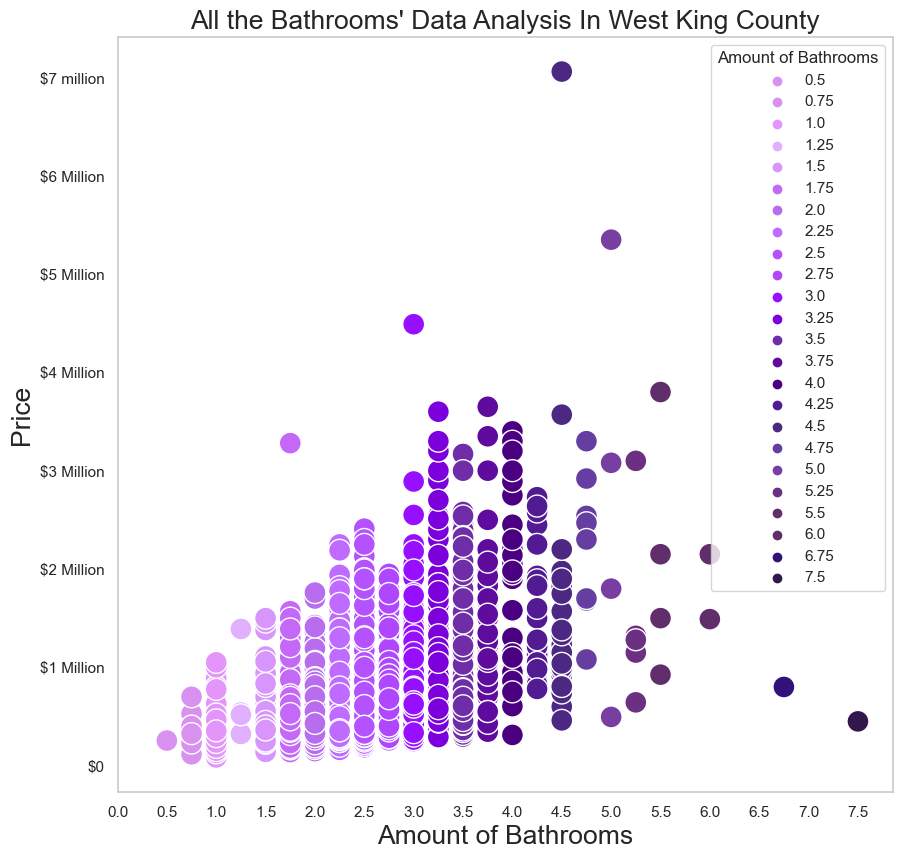

In [39]:
x = regressiondata2['Amount_of_Bathrooms']
y = regressiondata2['Price']
flatui = ['#d891ef','#d891ef','#e395f9','#e0b0ff','#d895fc','#c468f8',
          '#b76dee','#bf6bff', '#b452ff','#af47ff','#970fff','#7c00db',
          '#6f2da8','#5f0b9e','#4b0082','#521b93','#4c2882','#663ea1','#783ea1',
          '#6c3082', '#602f6b','#602f6b','#32127a','#32174d',
          ]

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata2, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Bathrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bathrooms\' Data Analysis In West King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.legend(title='Amount of Bathrooms')
plt.ylabel("Price", size=19)
plt.xticks(np.arange(0,7.75,0.5))
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million',
                    '$6 Million','$7 million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()

plt.show()

In [40]:
train_df, test_df = train_test_split(regressiondata2, test_size=0.10, shuffle=False)

In [41]:
X_train, y_train = train_df[['Amount_of_Bathrooms']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Bathrooms']], test_df[['Price']]

In [42]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [43]:
Quantile_regression1 = pd.DataFrame({'Amount_of_Bathrooms': X_test.reset_index()['Amount_of_Bathrooms'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [44]:
Quantile_regression1

,Amount_of_Bathrooms,0.1,0.5,0.9,Price
0,3.00,335522.352605,584970.750840,1.398984e+06,552100.0
1,3.00,335522.352605,584970.750840,1.398984e+06,785000.0
2,3.00,335522.352605,584970.750840,1.398984e+06,519995.0
3,3.00,335522.352605,584970.750840,1.398984e+06,334950.0
4,3.00,335522.352605,584970.750840,1.398984e+06,649500.0
...,...,...,...,...,...
577,6.00,335522.352605,584970.750840,1.398984e+06,2150000.0
578,6.00,335522.352605,584970.750840,1.398984e+06,1490000.0
579,0.50,170351.744461,270004.117017,5.000076e+05,255000.0
580,6.75,335522.352605,584970.750840,1.398984e+06,800000.0


In [45]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Bathrooms':[0.50,0.25,0.75,1.0,1.25,
                                                                  1.5,1.75,2.0,2.5,2.25,2.75,
                                                                  
                                                                  3.0,3.25,3.5,3.75,4.0,
                                                                  4.25,4.5,4.75,5.0,5.25,5.5,5.75,
                                                                  6.0,6.25,6.5,6.75,7,7.5],
    '0.1':[170351.744461,170351.744461,170351.744461,170351.744461,170351.744461,170351.744461,
          170351.744461,170351.744461,170351.744461,170351.744461,170351.744461,
          
           335522.352605,335522.352605,335522.352605,335522.352605,335522.352605,335522.352605,
          335522.352605,335522.352605,335522.352605,335522.352605,335522.352605,335522.352605,
          335522.352605,335522.352605,335522.352605,335522.352605,335522.352605,335522.352605],
                                           
 '0.5':[270004.117017,270004.117017,270004.117017,270004.117017,270004.117017,270004.117017,
       270004.117017,270004.117017,270004.117017,270004.117017,270004.117017,
       
       584970.750840,584970.750840,584970.750840,584970.750840,584970.750840,584970.750840,
        584970.750840,584970.750840,584970.750840,584970.750840,584970.750840,584970.750840,
        584970.750840,584970.750840,584970.750840,584970.750840,584970.750840,584970.750840,],
   '0.9':[5.000076e+05,5.000076e+05,5.000076e+05,5.000076e+05,5.000076e+05,5.000076e+05,
         5.000076e+05,5.000076e+05,5.000076e+05,5.000076e+05,5.000076e+05,
         
        1.398984e+06,1.398984e+06,1.398984e+06,1.398984e+06,1.398984e+06,1.398984e+06,
        1.398984e+06,1.398984e+06,1.398984e+06,1.398984e+06,1.398984e+06,1.398984e+06,
        1.398984e+06,1.398984e+06,1.398984e+06,1.398984e+06,1.398984e+06,1.398984e+06,]})
Quantileregression_updated

,Amount_of_Bathrooms,0.1,0.5,0.9
0,0.50,170351.744461,270004.117017,500007.6
1,0.25,170351.744461,270004.117017,500007.6
2,0.75,170351.744461,270004.117017,500007.6
3,1.00,170351.744461,270004.117017,500007.6
4,1.25,170351.744461,270004.117017,500007.6
5,1.50,170351.744461,270004.117017,500007.6
6,1.75,170351.744461,270004.117017,500007.6
7,2.00,170351.744461,270004.117017,500007.6
8,2.50,170351.744461,270004.117017,500007.6
9,2.25,170351.744461,270004.117017,500007.6


In [46]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Bathrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

,Amount_of_Bathrooms,Percentile,value
0,0.50,0.1,1.703517e+05
1,0.25,0.1,1.703517e+05
2,0.75,0.1,1.703517e+05
3,1.00,0.1,1.703517e+05
4,1.25,0.1,1.703517e+05
...,...,...,...
82,6.25,0.9,1.398984e+06
83,6.50,0.9,1.398984e+06
84,6.75,0.9,1.398984e+06
85,7.00,0.9,1.398984e+06


<ipython-input-47-8f13d9deaea5>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',


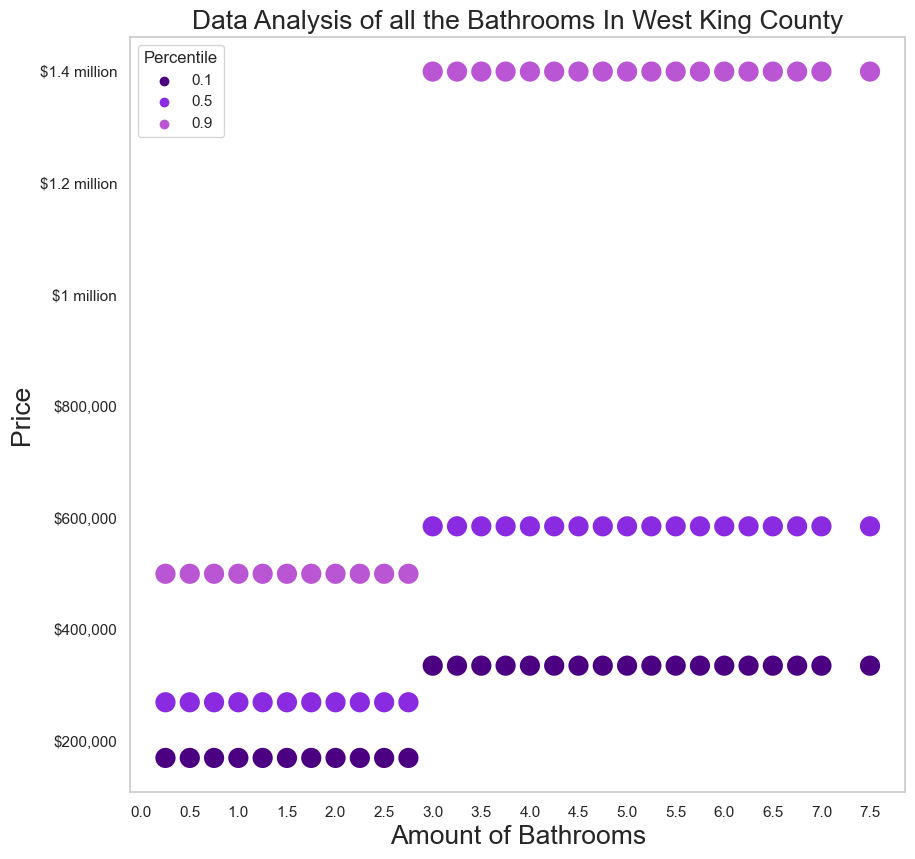

In [47]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax =sns.scatterplot(data=melted_data, x="Amount_of_Bathrooms",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.xticks(np.arange(0,7.75,0.5))     
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Bathrooms In West King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
        '$1 million','$1.2 million','$1.4 million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Bathrooms")
plt.gcf().set_size_inches((10,10))

<ipython-input-48-17fc86af4415>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 million'),
 Text(0, 1200000.0, '$1.2 million'),
 Text(0, 1400000.0, '$1.4 million'),
 Text(0, 1600000.0, '')]

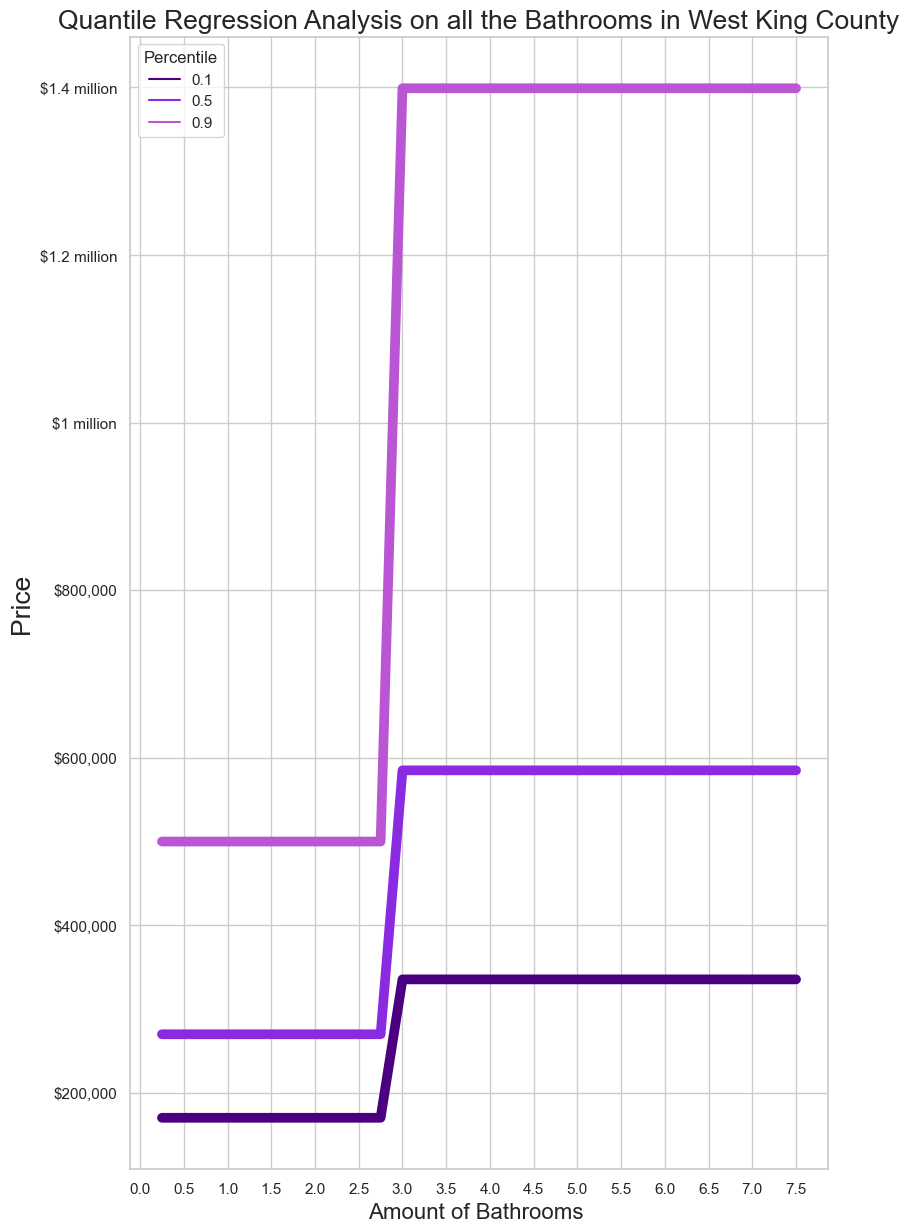

In [48]:
sns.set_style("whitegrid")
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax=sns.lineplot( data=melted_data, x="Amount_of_Bathrooms",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.xticks(np.arange(0,7.75,0.5))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Bathrooms in West King County',size=19)
plt.xlabel("Amount of Bathrooms ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
        '$1 million','$1.2 million','$1.4 million'])

In [49]:
(Quantile_regression1['Price'] > Quantile_regression1['0.1']).value_counts()

True     570
False     12
dtype: int64

In [50]:
i = 0
y= 0
x = []
while i < 570:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 12:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

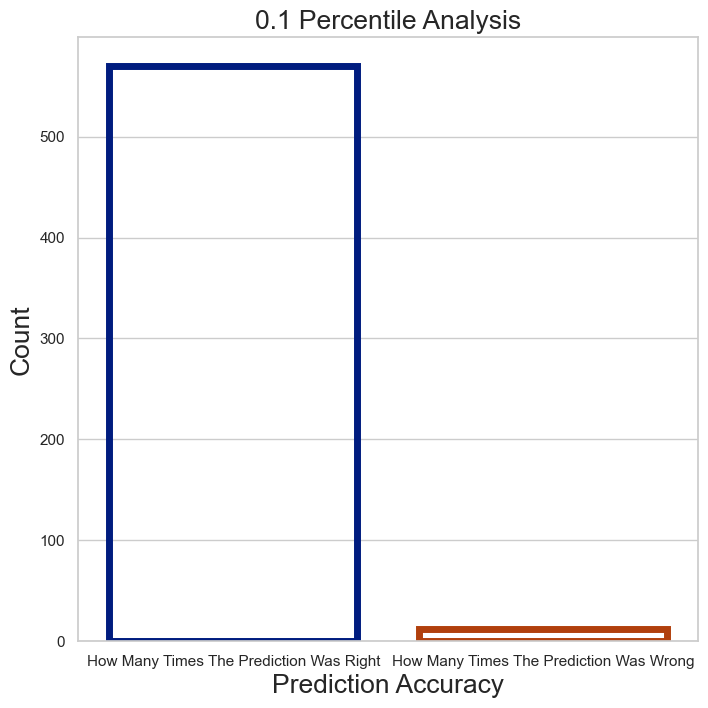

In [51]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [52]:
(Quantile_regression1['Price'] > Quantile_regression1['0.5']).value_counts()

True     474
False    108
dtype: int64

In [53]:
i = 0
y= 0
x = []
while i < 474:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 108:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

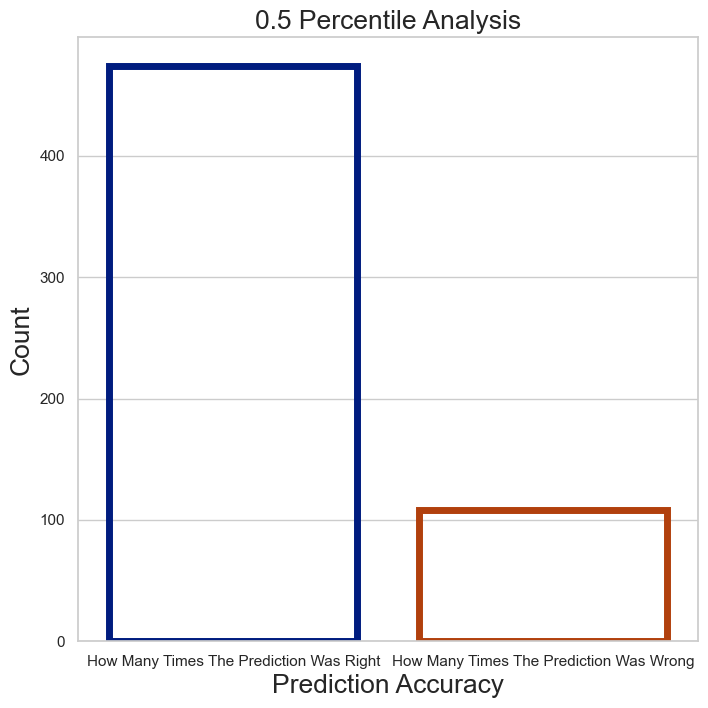

In [54]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [55]:
(Quantile_regression1['Price'] > Quantile_regression1['0.9']).value_counts()

False    426
True     156
dtype: int64

In [56]:
i = 0
y= 0
x = []
while i < 426:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 156:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

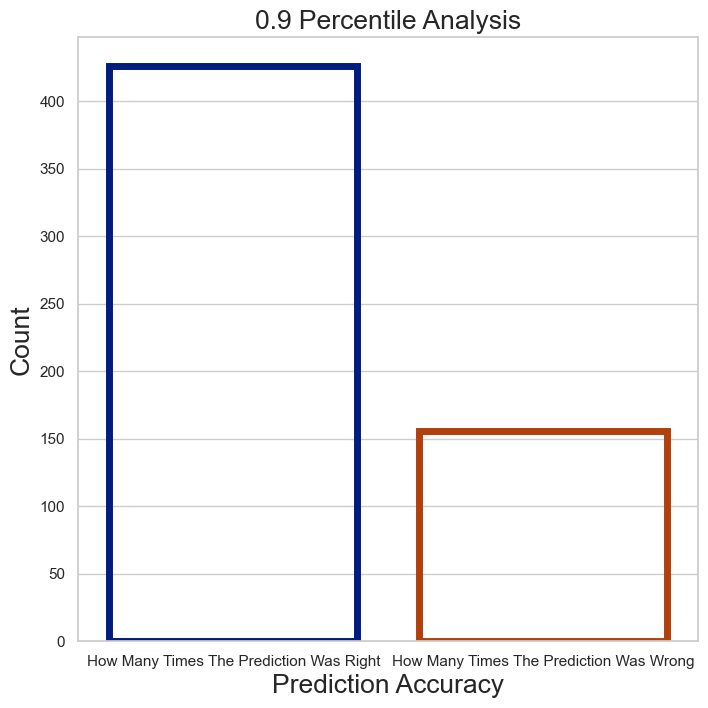

In [57]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [58]:
Predictions1 = []
for i in regressiondata2.Amount_of_Bathrooms:
    if i == 0.5:Predictions1.append('Between: $170,351 - $500,007')
    if i == 0.25:Predictions1.append('Between: $170,351 - $500,007')
    if i == 0.75: Predictions1.append('Between: $170,351 - $500,007')
    if i == 1.0:Predictions1.append('Between: $170,351 - $500,007')
    if i == 1.25:Predictions1.append('Between: $170,351 - $500,007')
    if i == 1.5:Predictions1.append('Between: $170,351 - $500,007') 
    if i == 1.75:Predictions1.append('Between: $170,351 - $500,007')
    if i == 2.0:Predictions1.append('Between: $170,351 - $500,007')
    if i == 2.25:Predictions1.append('Between: $170,351 - $500,007')
    if i == 2.5:Predictions1.append('Between: $170,351 - $500,007') 
    if i == 2.75:Predictions1.append('Between: $170,351 - $500,007')
    if i == 3.0: Predictions1.append('Between: $335,522 - $1,398,984')
    if i == 3.25:Predictions1.append('Between: $335,522 - $1,398,984')
    if i == 3.5:Predictions1.append('Between: $335,522 - $1,398,984') 
    if i == 3.75:Predictions1.append('Between: $335,522 - $1,398,984')
    if i == 4.0:Predictions1.append('Between: $335,522 - $1,398,984')
    if i == 4.25:Predictions1.append('Between: $335,522 - $1,398,984')
    if i == 4.5:Predictions1.append('Between: $335,522 - $1,398,984')
    if i == 4.75: Predictions1.append('Between: $335,522 - $1,398,984')
    if i == 5.0:Predictions1.append('Between: $335,522 - $1,398,984')
    if i == 5.25:Predictions1.append('Between: $335,522 - $1,398,984') 
    if i == 5.5:Predictions1.append('Between: $335,522 - $1,398,984') 
    if i == 5.75:Predictions1.append('Between: $335,522 - $1,398,984') 
    if i == 6.0:Predictions1.append('Between: $335,522 - $1,398,984')
    if i == 6.25:Predictions1.append('Between: $335,522 - $1,398,984') 
    if i == 6.5:Predictions1.append('Between: $335,522 - $1,398,984')  
    if i == 6.75:Predictions1.append('Between: $335,522 - $1,398,984') 
    if i == 7.0:Predictions1.append('Between: $335,522 - $1,398,984') 
    if i == 7.5:Predictions1.append('Between: $335,522 - $1,398,984') 
len(Predictions1)

5816

In [59]:
price = []
for i in regressiondata2.Price:
    price.append("${:,.0f}".format(i))
len(price)

5816

In [60]:
Prediction1 = pd.DataFrame({'Amount of Bathrooms':regressiondata2.Amount_of_Bathrooms,
                           'Prediction':Predictions1,'Actual Price':price})
Prediction1

,Amount of Bathrooms,Prediction,Actual Price
0,2.50,"Between: $170,351 - $500,007","$605,000"
1,2.50,"Between: $170,351 - $500,007","$625,000"
2,2.50,"Between: $170,351 - $500,007","$345,000"
3,2.50,"Between: $170,351 - $500,007","$975,000"
4,2.50,"Between: $170,351 - $500,007","$437,500"
...,...,...,...
5811,6.00,"Between: $335,522 - $1,398,984","$2,150,000"
5812,6.00,"Between: $335,522 - $1,398,984","$1,490,000"
5813,0.50,"Between: $170,351 - $500,007","$255,000"
5814,6.75,"Between: $335,522 - $1,398,984","$800,000"


In [61]:
def PRICE_FLOORS(AMOUNT_FLOORS):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_floors = house_info['Floors'].tolist()

    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)
    len(floors_index)
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    floors_westking = []
    for i in floors_index:
        if locations[i] == zip_loca[0] : floors_westking.append(i)
        elif locations[i] == zip_loca[1] : floors_westking.append(i)
        elif locations[i] == zip_loca[2] : floors_westking.append(i)
        elif locations[i] == zip_loca[3] : floors_westking.append(i)
        elif locations[i] == zip_loca[4]: floors_westking.append(i)
        elif locations[i] == zip_loca[5] : floors_westking.append(i)
        elif locations[i] == zip_loca[6] : floors_westking.append(i)
        elif locations[i] == zip_loca[7]: floors_westking.append(i)
        elif locations[i] == zip_loca[8] : floors_westking.append(i)
        elif locations[i] == zip_loca[9] : floors_westking.append(i)
        elif locations[i] == zip_loca[10] : floors_westking.append(i)
        elif locations[i] == zip_loca[11] : floors_westking.append(i)
        elif locations[i] == zip_loca[12]: floors_westking.append(i)
        elif locations[i] == zip_loca[13] : floors_westking.append(i)
        elif locations[i] == zip_loca[14] : floors_westking.append(i)
        elif locations[i] == zip_loca[15] : floors_westking.append(i)
        elif locations[i] == zip_loca[16]: floors_westking.append(i)
        elif locations[i] == zip_loca[17] : floors_westking.append(i)
        elif locations[i] == zip_loca[18]: floors_westking.append(i)
        elif locations[i] == zip_loca[19] : floors_westking.append(i)
        elif locations[i] == zip_loca[20]: floors_westking.append(i)
        elif locations[i] == zip_loca[21] : floors_westking.append(i)
        elif locations[i] == zip_loca[22] : floors_westking.append(i)
        elif locations[i] == zip_loca[23] : floors_westking.append(i)
        elif locations[i] == zip_loca[24] : floors_westking.append(i)
        elif locations[i] == zip_loca[25] : floors_westking.append(i)
        elif locations[i] == zip_loca[26] : floors_westking.append(i)
        elif locations[i] == zip_loca[27] : floors_westking.append(i)
        elif locations[i] == zip_loca[28]: floors_westking.append(i)
        elif locations[i] == zip_loca[29] : floors_westking.append(i)
        elif locations[i] == zip_loca[30] : floors_westking.append(i)
        elif locations[i] == zip_loca[31]: floors_westking.append(i)
        elif locations[i] == zip_loca[32] : floors_westking.append(i)
        elif locations[i] == zip_loca[33] : floors_westking.append(i)
        elif locations[i] == zip_loca[34] : floors_westking.append(i)

    price = house_info["Price"].tolist()

    price_westking = []
    for i in floors_westking:price_westking.append(price[i])
    return(price_westking)

no_of_floors = house_info["Floors"].value_counts().index.tolist()
price_floors_westking= []
for i in no_of_floors:
    price_floors_westking.append(PRICE_FLOORS(i))
price_floors_westking = sum(price_floors_westking, [])
len(price_floors_westking)

5816

In [62]:
def AMOUNT_FLOORS(AMOUNT_FLOORS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_floors = house_info["Floors"].tolist()
    X_value = []
    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    for i in floors_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_FLOORS)
    return X_value
no_of_floors = house_info["Floors"].value_counts().index.tolist()
amount_floors_westking = []
for i in no_of_floors:
    amount_floors_westking.append(AMOUNT_FLOORS(i))
amount_floors_westking= sum(amount_floors_westking, [])
len(amount_floors_westking)

5816

In [63]:
regressiondata3 = pd.DataFrame({'Amount_of_Floors':amount_floors_westking,
                                'Price':price_floors_westking})
#regressiondata3.Amount_of_Floors.value_counts()
regressiondata3

,Amount_of_Floors,Price
0,1.0,221900.0
1,1.0,510000.0
2,1.0,229500.0
3,1.0,400000.0
4,1.0,322500.0
...,...,...
5811,2.5,526000.0
5812,2.5,414000.0
5813,2.5,424950.0
5814,2.5,424950.0


<ipython-input-64-09b3ed0ba9ed>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million',


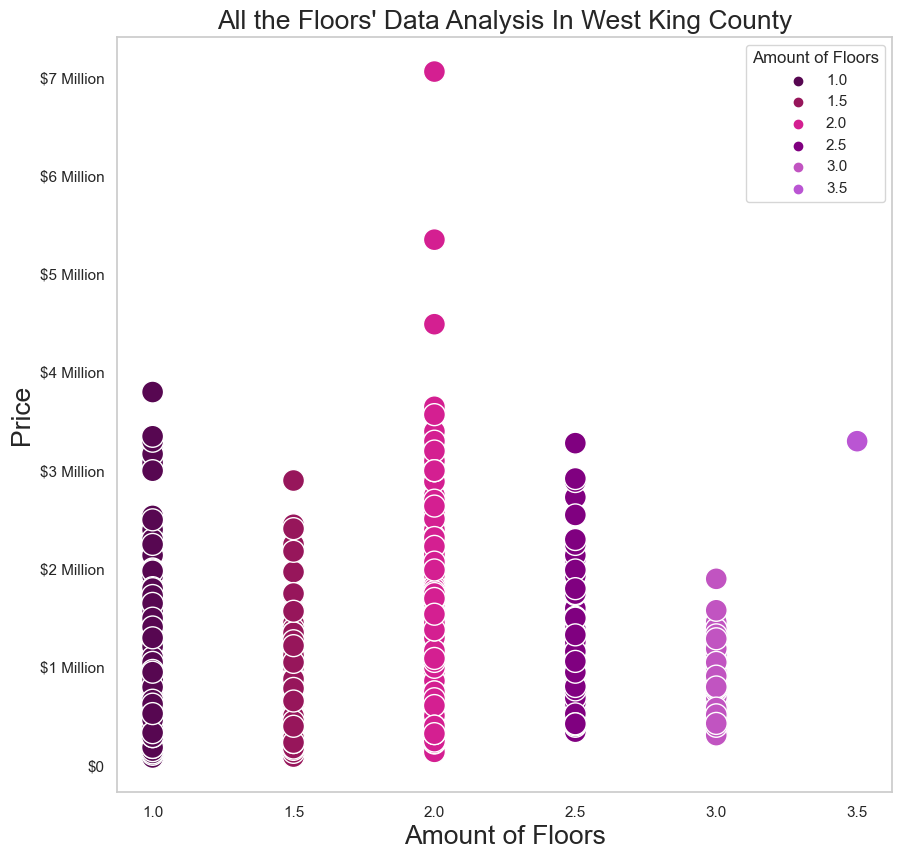

In [64]:
x = regressiondata3['Amount_of_Floors']
y = regressiondata3['Price']
flatui = ['#570751','#97165B','#D41F91','#800080','#c154c1','#ba55d3']
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata3, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Floors', palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Floors\' Data Analysis In West King County',size=19)
plt.xlabel("Amount of Floors", size=19)
plt.legend(title='Amount of Floors')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million',
                    '$4 Million','$5 Million','$6 Million','$7 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [65]:
train_df, test_df = train_test_split(regressiondata3, test_size=0.10, shuffle=False)

In [66]:
X_train, y_train = train_df[['Amount_of_Floors']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Floors']], test_df[['Price']]

In [67]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [68]:
Quantile_regression2 = pd.DataFrame({'Amount_of_Floors': X_test.reset_index()['Amount_of_Floors'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [69]:
Quantile_regression2

,Amount_of_Floors,0.1,0.5,0.9,Price
0,1.5,253969.644272,534997.476667,1.929972e+06,290000.0
1,1.5,253969.644272,534997.476667,1.929972e+06,451000.0
2,1.5,253969.644272,534997.476667,1.929972e+06,915000.0
3,1.5,253969.644272,534997.476667,1.929972e+06,260000.0
4,1.5,253969.644272,534997.476667,1.929972e+06,399000.0
...,...,...,...,...,...
577,2.5,344997.211053,549897.080902,1.089995e+06,526000.0
578,2.5,344997.211053,549897.080902,1.089995e+06,414000.0
579,2.5,344997.211053,549897.080902,1.089995e+06,424950.0
580,2.5,344997.211053,549897.080902,1.089995e+06,424950.0


In [70]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Floors':[1.0,1.5,2.0,2.5,3.0,3.5],
    '0.1':[253969.644272,253969.644272,253969.644272,344997.211053,344997.211053,344997.211053],
'0.5':[534997.476667,534997.476667,534997.476667,549897.080902,549897.080902,549897.080902],
'0.9':[1.929972e+06,1.929972e+06,1.929972e+06,1.089995e+06,1.089995e+06,1.089995e+06]})
Quantileregression_updated

,Amount_of_Floors,0.1,0.5,0.9
0,1.0,253969.644272,534997.476667,1929972.0
1,1.5,253969.644272,534997.476667,1929972.0
2,2.0,253969.644272,534997.476667,1929972.0
3,2.5,344997.211053,549897.080902,1089995.0
4,3.0,344997.211053,549897.080902,1089995.0
5,3.5,344997.211053,549897.080902,1089995.0


In [71]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Floors'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

,Amount_of_Floors,Percentile,value
0,1.0,0.1,2.539696e+05
1,1.5,0.1,2.539696e+05
2,2.0,0.1,2.539696e+05
3,2.5,0.1,3.449972e+05
4,3.0,0.1,3.449972e+05
5,3.5,0.1,3.449972e+05
6,1.0,0.5,5.349975e+05
7,1.5,0.5,5.349975e+05
8,2.0,0.5,5.349975e+05
9,2.5,0.5,5.498971e+05


<ipython-input-72-13edf5668e16>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million',


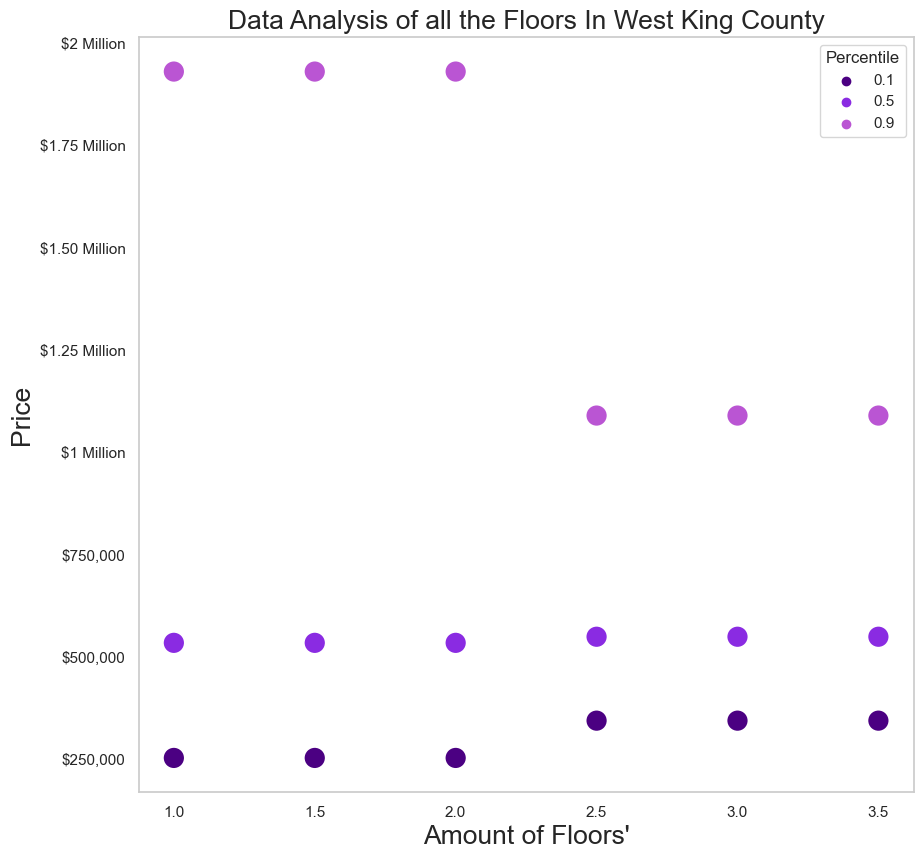

In [72]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax =sns.scatterplot(data=melted_data, x="Amount_of_Floors",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Floors In West King County',size=19)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million',
                    '$1.25 Million','$1.50 Million','$1.75 Million','$2 Million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Floors'")
plt.gcf().set_size_inches((10,10))

<ipython-input-73-c458cf74f881>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million',


[Text(0, 0.0, '0'),
 Text(0, 250000.0, '$250,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 750000.0, '$750,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1250000.0, '$1.25 Million'),
 Text(0, 1500000.0, '$1.50 Million'),
 Text(0, 1750000.0, '$1.75 Million'),
 Text(0, 2000000.0, '$2 Million'),
 Text(0, 2250000.0, '')]

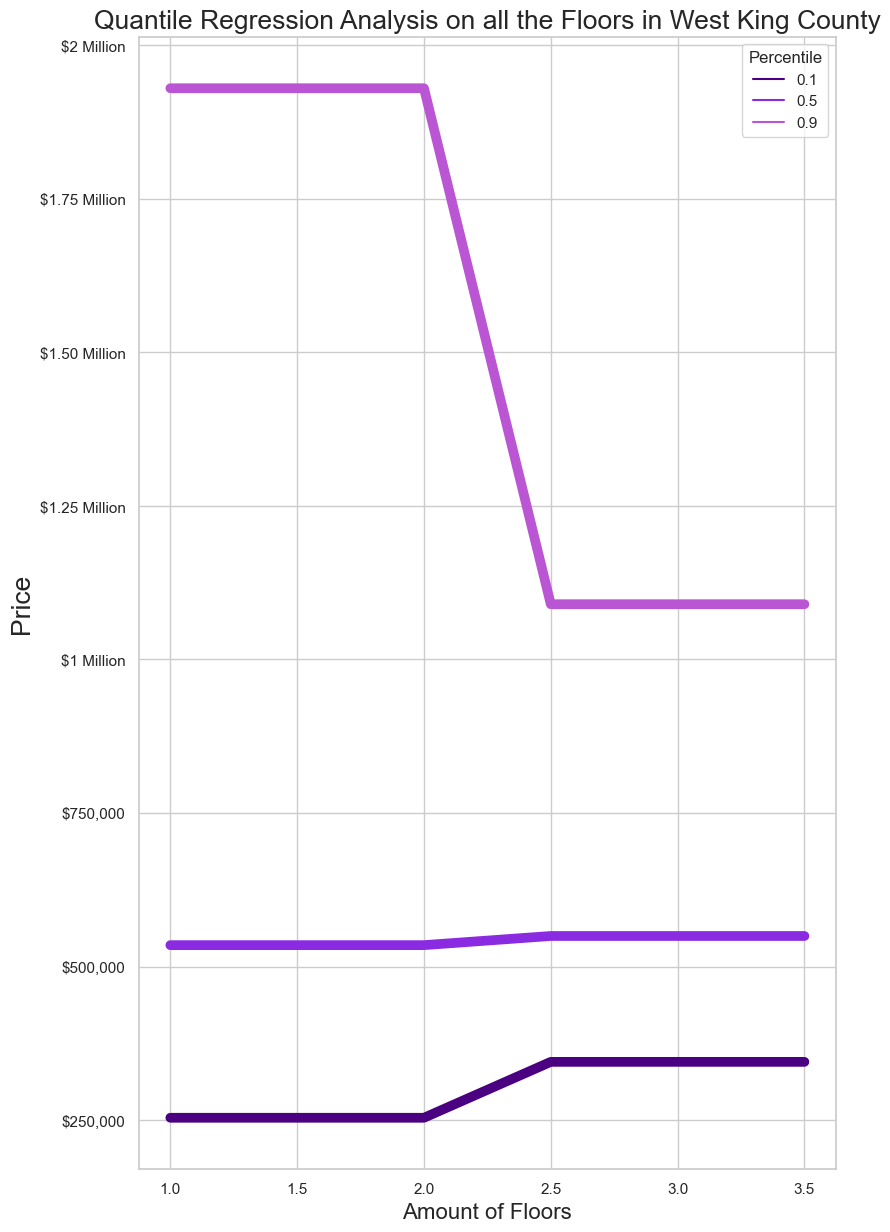

In [73]:
sns.set_style("whitegrid")
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax=sns.lineplot( data=melted_data, x="Amount_of_Floors",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Floors in West King County',size=19)
plt.xlabel("Amount of Floors", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million',
                    '$1.25 Million','$1.50 Million','$1.75 Million','$2 Million'])

In [74]:
(Quantile_regression2['Price'] > Quantile_regression2['0.1']).value_counts()

True     518
False     64
dtype: int64

In [75]:
i = 0
y= 0
x = []
while i < 518:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 518:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [76]:
(Quantile_regression2['Price'] > Quantile_regression2['0.5']).value_counts()

False    296
True     286
dtype: int64

In [77]:
i = 0
y= 0
x = []
while i < 296:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 286:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [78]:
(Quantile_regression2['Price'] > Quantile_regression2['0.9']).value_counts()

False    539
True      43
dtype: int64

In [79]:
i = 0
y= 0
x = []
while i < 539:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 43:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

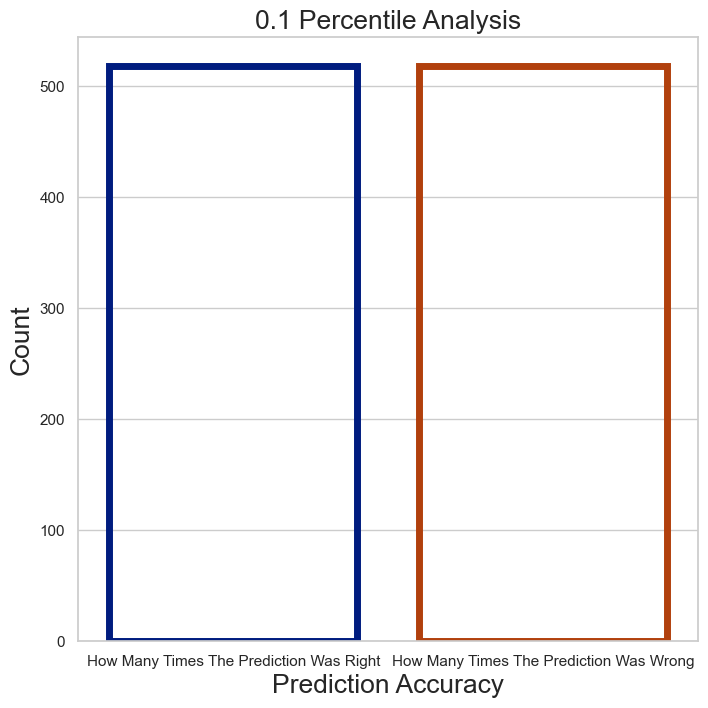

In [80]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

Text(0, 0.5, 'Count')

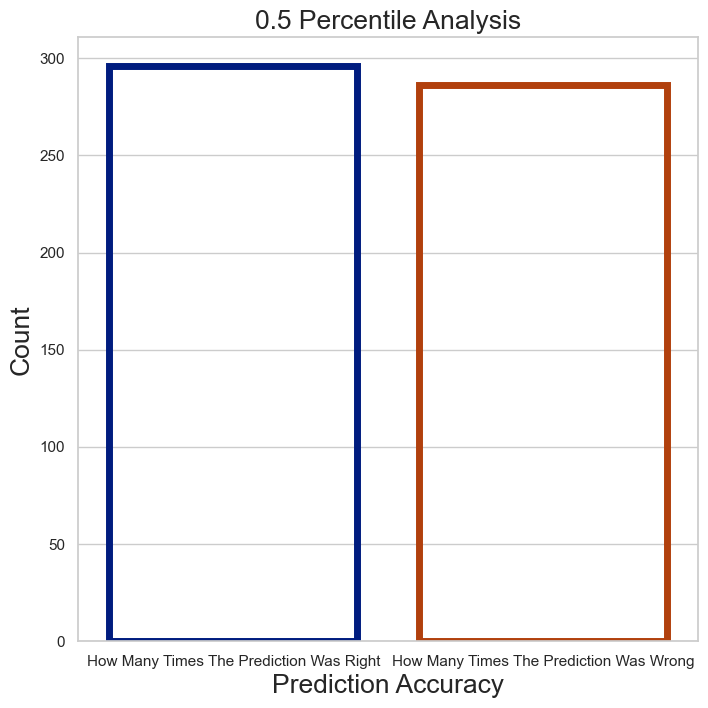

In [81]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

Text(0, 0.5, 'Count')

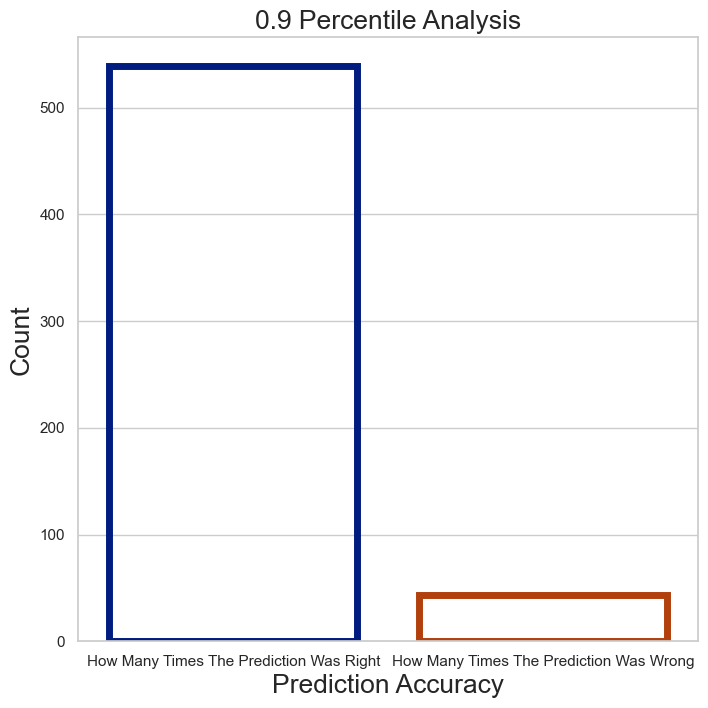

In [82]:
 sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [83]:
Predictions2 = []
for i in regressiondata3.Amount_of_Floors:
    if i == 1.0:Predictions2.append('Between: $253,969 - $1,929,972') 
    if i == 1.5:Predictions2.append('Between: $253,969 - $1,929,972') 
    if i == 2.0:Predictions2.append('Between: $253,969 - $1,929,972')
        
    if i == 2.5:Predictions2.append('Between: $344,997 - $1,089,995') 
    if i == 3.0: Predictions2.append('Between: $344,997  - $1,089,995')
    if i == 3.5: Predictions2.append('Between: $344,997  - $1,089,995')
len(Predictions2)

5816

In [84]:
price = []
for i in regressiondata3.Price:
    price.append("${:,.0f}".format(i))

In [85]:
Prediction2 = pd.DataFrame({'Amount of Floors':regressiondata3.Amount_of_Floors,
                           'Prediction':Predictions2,'Actual Price':price})
Prediction2

,Amount of Floors,Prediction,Actual Price
0,1.0,"Between: $253,969 - $1,929,972","$221,900"
1,1.0,"Between: $253,969 - $1,929,972","$510,000"
2,1.0,"Between: $253,969 - $1,929,972","$229,500"
3,1.0,"Between: $253,969 - $1,929,972","$400,000"
4,1.0,"Between: $253,969 - $1,929,972","$322,500"
...,...,...,...
5811,2.5,"Between: $344,997 - $1,089,995","$526,000"
5812,2.5,"Between: $344,997 - $1,089,995","$414,000"
5813,2.5,"Between: $344,997 - $1,089,995","$424,950"
5814,2.5,"Between: $344,997 - $1,089,995","$424,950"


In [86]:
def PRICE_YEARS_BUILT(YEAR_BUILT):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    year_built = house_info['Year Built'].tolist()

    years_built_index = []
    for i,x in enumerate(year_built):
        if x == YEAR_BUILT:years_built_index.append(i)
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    years_built_westking = []
    for i in years_built_index:
        if locations[i] == zip_loca[0] : years_built_westking.append(i)
        elif locations[i] == zip_loca[1] : years_built_westking.append(i)
        elif locations[i] == zip_loca[2] : years_built_westking.append(i)
        elif locations[i] == zip_loca[3] : years_built_westking.append(i)
        elif locations[i] == zip_loca[4]: years_built_westking.append(i)
        elif locations[i] == zip_loca[5] : years_built_westking.append(i)
        elif locations[i] == zip_loca[6] : years_built_westking.append(i)
        elif locations[i] == zip_loca[7]: years_built_westking.append(i)
        elif locations[i] == zip_loca[8] : years_built_westking.append(i)
        elif locations[i] == zip_loca[9] : years_built_westking.append(i)
        elif locations[i] == zip_loca[10] : years_built_westking.append(i)
        elif locations[i] == zip_loca[11] : years_built_westking.append(i)
        elif locations[i] == zip_loca[12]: years_built_westking.append(i)
        elif locations[i] == zip_loca[13] : years_built_westking.append(i)
        elif locations[i] == zip_loca[14] : years_built_westking.append(i)
        elif locations[i] == zip_loca[15] : years_built_westking.append(i)
        elif locations[i] == zip_loca[16]: years_built_westking.append(i)
        elif locations[i] == zip_loca[17] : years_built_westking.append(i)
        elif locations[i] == zip_loca[18]: years_built_westking.append(i)
        elif locations[i] == zip_loca[19] : years_built_westking.append(i)
        elif locations[i] == zip_loca[20]: years_built_westking.append(i)
        elif locations[i] == zip_loca[21] : years_built_westking.append(i)
        elif locations[i] == zip_loca[22] : years_built_westking.append(i)
        elif locations[i] == zip_loca[23] : years_built_westking.append(i)
        elif locations[i] == zip_loca[24] : years_built_westking.append(i)
        elif locations[i] == zip_loca[25] : years_built_westking.append(i)
        elif locations[i] == zip_loca[26] : years_built_westking.append(i)
        elif locations[i] == zip_loca[27] : years_built_westking.append(i)
        elif locations[i] == zip_loca[28]: years_built_westking.append(i)
        elif locations[i] == zip_loca[29] : years_built_westking.append(i)
        elif locations[i] == zip_loca[30] : years_built_westking.append(i)
        elif locations[i] == zip_loca[31]: years_built_westking.append(i)
        elif locations[i] == zip_loca[32] : years_built_westking.append(i)
        elif locations[i] == zip_loca[33] : years_built_westking.append(i)
        elif locations[i] == zip_loca[34] : years_built_westking.append(i)


    price = house_info["Price"].tolist()

    price_westking = []
    for i in years_built_westking:price_westking.append(price[i])
    return(price_westking)

no_of_Year = house_info["Year Built"].value_counts().index.tolist()
price_Year_westking = []
for i in no_of_Year:
    price_Year_westking.append(PRICE_YEARS_BUILT(i))
price_Year_westking = sum(price_Year_westking, [])
len(price_Year_westking)

5816

In [87]:
def AMOUNT_YEARS_BUILT(AMOUNT_YEARS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    years_built = house_info["Year Built"].tolist()
    X_value = []
    years_index = []
    for i,x in enumerate(years_built):
        if x == AMOUNT_YEARS:years_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    for i in years_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_YEARS)
        

    return X_value
no_of_years = house_info["Year Built"].value_counts().index.tolist()
amount_years_westking = []
for i in no_of_years:
    amount_years_westking.append(AMOUNT_YEARS_BUILT(i))
amount_years_westking= sum(amount_years_westking, [])
len(amount_years_westking)

5816

In [88]:
regressiondata4 = pd.DataFrame({'Year_Built':amount_years_westking,
                                'Price':price_Year_westking})
regressiondata4

,Year_Built,Price
0,2014,453246.0
1,2014,559950.0
2,2014,499950.0
3,2014,866500.0
4,2014,372977.0
...,...,...
5811,1934,272000.0
5812,1934,420000.0
5813,1934,230000.0
5814,1934,275000.0


In [89]:
year = regressiondata4['Year_Built'].value_counts()
year

2014    159
2007    139
2005    138
2006    134
2004    132
       ... 
1936     10
1933      8
1932      8
1935      7
1934      7
Name: Year_Built, Length: 116, dtype: int64

In [90]:
reg1,year1 = [],[]
for i,x in enumerate(amount_years_westking):
    if x == 1900:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1901:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1902:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1903:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1904:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1905:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1906:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1907:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1908:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1909:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1910:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1911:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1912:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1913:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1914:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1915:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1916:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1917:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1918:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1919:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1920:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1921:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1922:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1923:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1924:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1925:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1926:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1927:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1928:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1929:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1930:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1931:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1932:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1933:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if i == 1934:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1935:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1936:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1937:
        reg1.append(price_Year_westking[i])
        year1.append(x)
reg1.remove(1030000.0)
year1.remove(1989) 

In [91]:
regressiondata44 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
#for i,x in enumerate(regressiondata44.Year_Built):print(i,x,regressiondata44.Price[i])
x= regressiondata44.Year_Built.value_counts()
len(x)

37

In [92]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_westking):
    if x == 1938:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1939:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1940:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1941:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1942:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1943:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1944:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1945:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1946:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1947:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1948:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1949:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1950:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1951:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1952:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1953:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1954:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1955:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1956:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1957:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1958:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1959:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1960:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1961:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1962:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1963:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1964:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1965:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1966:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1967:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1968:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1969:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1970:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1971:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if i == 1972:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1973:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1974:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1975:
        reg1.append(price_Year_westking[i])
        year1.append(x)

In [93]:
regressiondata45 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata45

,Year_Built,Price
0,1968,951000.0
1,1968,320000.0
2,1968,389999.0
3,1968,269900.0
4,1968,426700.0
...,...,...
2173,1938,200000.0
2174,1938,210000.0
2175,1938,212500.0
2176,1938,825000.0


In [94]:
x= regressiondata45.Year_Built.value_counts()
len(x)

37

In [95]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_westking):
    if x == 1976:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1977:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1978:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1979:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1980:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1981:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1982:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1983:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1984:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1985:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1986:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1987:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1988:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1989:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1990:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1991:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1992:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1993:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1994:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1995:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1996:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1997:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1998:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1999:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2001:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2002:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2003:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2004:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2005:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2006:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2007:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2008:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2009:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2010:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if i == 2011:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2012:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2013:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2014:
        reg1.append(price_Year_westking[i])
        year1.append(x)
reg1.remove(245000.0)
year1.remove(1955) 

In [96]:
regressiondata46 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata46
x= regressiondata46.Year_Built.value_counts()
len(x)
#for i,x in enumerate(regressiondata46.Year_Built):print(i,x,reg1[i])

37

In [212]:
flatui2 = ['#9304FF','#9512F9','#9C23F9','#A433FA','#B25FF1','#A23FED',
          '#9843D9','#8119D1','#7E11D2','#790CCC','#7C09D3','#7508C9',
          
         '#7F26B4','#7929A9','#8743AF','#CDA7E3','#D5CADC','#E6E0E9',
         '#F0EBF3','#E6E0E9','#D5CADC','#DAC8E6','#D7BAEA','#612589',
          
          '#570C87','#5D1A88','#611194','#56197D','#5C297D','#5B3574',
          '#60337D','#562676','#6E3792','#693C86','#6B2F92','#61198F','#260340']#37

In [213]:
flatui1 = ['#5E00FB','#701DFB','#823BF8','#5E0FE1','#5404DB','#9356F8',
          '#631BDB','#622ABE','#531BB1','#4C09BC','#5318B5','#450CA5','#6A33C5',
          
          '#60299F','#511297','#9B75DA','#CDBFE6','#D5C7EE','#E6DFF2',
          '#F0EEF3','#E6DFF2','#D5C7EE','#CDBFE6','#573392','#5122A0',
          
          '#5513A0','#582294','#48098F','#41276B','#391A6D','#340E74',
          '#54159B','#31185A','#32106A','#32067B','#300E68','#2B056C']#37

In [214]:
flatui3 = ['#DB00FF','#D913F9','#DD28FB','#E13CFD','#E15FF7','#D665E9',
          '#BC45D0','#AC2EC1','#A91AC0','#AA0DC4','#A407BE','#A117B7',
          
         '#8629A0', '#9122B0','#8E3B9B','#CDB3D2','#D5BED8','#E6DEE7',
          '#F0E9F1','#E6DEE7','#D5BED8','#CDB3D2','#C189CA','#701080',
          
          '#8B3D97','#850D99','#7A1F89','#771088','#711E7F','#7C0A8F','#6B0E7B',
          '#6D0B93','#5B2A64','#4F2056','#4E1657','#450C4F','#470152',]#37

<ipython-input-215-1e12734c6257>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million','$3 Million'])
<ipython-input-215-1e12734c6257>:17: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)
<ipython-input-215-1e12734c6257>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million','$6 Million','$7 Million'])
<ipython-input-215-1e12734c6257>:36: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)
<ipython-input-215-1e12734c6257>:53: UserWarn

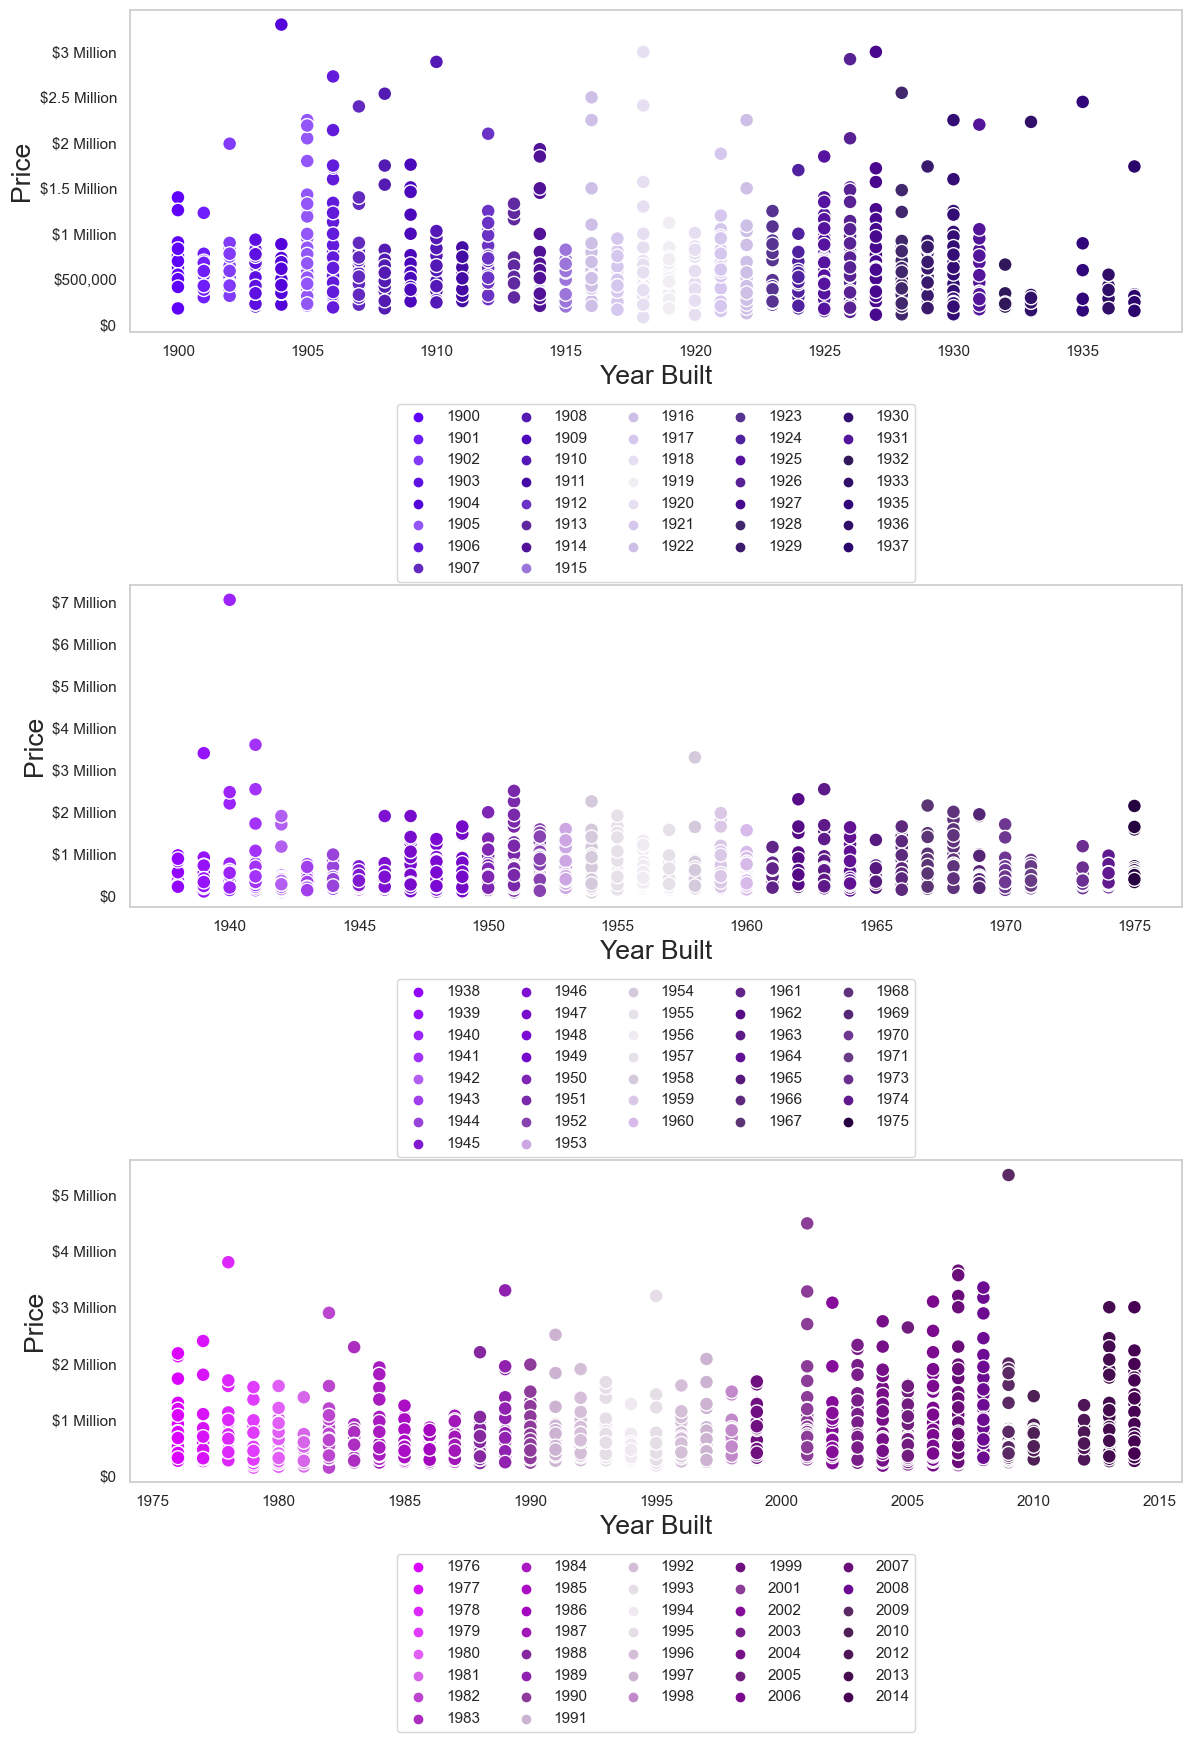

In [215]:
plt.subplot(3,1,1) #35 years in tottal
x = regressiondata44['Year_Built']
y = regressiondata44['Price']
data=regressiondata44
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata44, x=x, y=y,s=100, linewidth = 1, hue='Year_Built',
                    palette=flatui1)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In North King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million','$3 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
plt.tight_layout(1)

#xticks=ax.xaxis.get_major_ticks()

plt.subplot(3,1,2)
x = regressiondata45['Year_Built']
y = regressiondata45['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata45, x=x, y=y,s=100, linewidth = 1, hue='Year_Built'
                    ,palette=flatui2)
plt.grid(linestyle='-', linewidth=0.2)

plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million','$6 Million','$7 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
plt.tight_layout(1)

#xticks=ax.xaxis.get_major_ticks(1930,1995)
#plt.xticks(np.arange(1930,1995)) 

plt.subplot(3,1,3)
sns.set(style="whitegrid")
x = regressiondata46['Year_Built']
y = regressiondata46['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata46, x=x, y=y,s=100, linewidth = 1, hue='Year_Built',
                    palette=flatui3)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In South King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
#plt.tight_layout(1)
plt.show()


In [246]:
train_df, test_df = train_test_split(regressiondata4, test_size=0.90, shuffle=False)

In [247]:
X_train, y_train = train_df[['Year_Built']], train_df[['Price']]
X_test, y_test = test_df[['Year_Built']], test_df[['Price']]

In [248]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [249]:
Quantile_regression3 = pd.DataFrame({'Year_Built': X_test.reset_index()['Year_Built'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [297]:
Quantile_regression3[500:]

,Year_Built,0.1,0.5,0.9,Price
500,2008,351199.89302,530000.044889,1.117997e+06,720000.0
501,2008,351199.89302,530000.044889,1.117997e+06,1450000.0
502,2008,351199.89302,530000.044889,1.117997e+06,780000.0
503,2008,351199.89302,530000.044889,1.117997e+06,465000.0
504,2008,351199.89302,530000.044889,1.117997e+06,1260000.0
...,...,...,...,...,...
5230,1934,340000.18593,499000.868292,9.750004e+05,272000.0
5231,1934,340000.18593,499000.868292,9.750004e+05,420000.0
5232,1934,340000.18593,499000.868292,9.750004e+05,230000.0
5233,1934,340000.18593,499000.868292,9.750004e+05,275000.0


In [282]:
melted_data = pd.melt(Quantile_regression3, id_vars=['Year_Built'])
melted_data = melted_data.dropna()
#melted_data = melted_data.drop(range(1746,2328))#0.1
melted_data = melted_data.drop(range(15705,20940))#0.9
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

,Year_Built,Percentile,value
0,2003,0.1,340000.18593
1,2003,0.1,340000.18593
2,2003,0.1,340000.18593
3,2003,0.1,340000.18593
4,2003,0.1,340000.18593
...,...,...,...
15700,1934,0.9,975000.43512
15701,1934,0.9,975000.43512
15702,1934,0.9,975000.43512
15703,1934,0.9,975000.43512


In [285]:
Quantileregression_updated = pd.DataFrame({'Year_Built':[1900,1901,1902,1903,1904,1905,1906,1907,1908,
                                                         1909,
                                                        1910,1911,1912,1913,1914,1915,1916,1917,1918,
                                                        1919,
                                                        1920,1921,1922,1923,1924,1925,1926,1927,1928,
                                                         1929,
                                                        1930,1931,1932,1933,1934,1935,1935,1936,1937],
'0.1':[340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593],
'0.5':[499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292], 
'0.9':[975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512 ]})
Quantileregression_updated

,Year_Built,0.1,0.5,0.9
0,1900,340000.18593,499000.868292,975000.43512
1,1901,340000.18593,499000.868292,975000.43512
2,1902,340000.18593,499000.868292,975000.43512
3,1903,340000.18593,499000.868292,975000.43512
4,1904,340000.18593,499000.868292,975000.43512
5,1905,340000.18593,499000.868292,975000.43512
6,1906,340000.18593,499000.868292,975000.43512
7,1907,340000.18593,499000.868292,975000.43512
8,1908,340000.18593,499000.868292,975000.43512
9,1909,340000.18593,499000.868292,975000.43512


In [286]:
melted_data1 = pd.melt(Quantileregression_updated, id_vars=['Year_Built'])
melted_data1 = melted_data1.rename(columns={'variable': 'Percentile'})
melted_data1

,Year_Built,Percentile,value
0,1900,0.1,340000.18593
1,1901,0.1,340000.18593
2,1902,0.1,340000.18593
3,1903,0.1,340000.18593
4,1904,0.1,340000.18593
...,...,...,...
112,1934,0.9,975000.43512
113,1935,0.9,975000.43512
114,1935,0.9,975000.43512
115,1936,0.9,975000.43512


In [287]:
Quantileregression_updated = pd.DataFrame({'Year_Built':[1938,1939,1940,1941,1942,1943,1944,1945,
                                                        1946,1947,1948,1949,1950,1951,1952,1953,
                                                        1954,1955,1956,1957,1958,1959,1960,1961,
                                                        1962,1963,1964,1965,1966,1967,1968,1969,
                                                        1970,1971,1972,1973,1974,1975],
'0.1':[340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593],
'0.5':[499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292], 
'0.9':[975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512]})
Quantileregression_updated

,Year_Built,0.1,0.5,0.9
0,1938,340000.18593,499000.868292,975000.43512
1,1939,340000.18593,499000.868292,975000.43512
2,1940,340000.18593,499000.868292,975000.43512
3,1941,340000.18593,499000.868292,975000.43512
4,1942,340000.18593,499000.868292,975000.43512
5,1943,340000.18593,499000.868292,975000.43512
6,1944,340000.18593,499000.868292,975000.43512
7,1945,340000.18593,499000.868292,975000.43512
8,1946,340000.18593,499000.868292,975000.43512
9,1947,340000.18593,499000.868292,975000.43512


In [289]:
melted_data2 = pd.melt(Quantileregression_updated, id_vars=['Year_Built'])
melted_data2 = melted_data2.rename(columns={'variable': 'Percentile'})
melted_data2

,Year_Built,Percentile,value
0,1938,0.1,340000.18593
1,1939,0.1,340000.18593
2,1940,0.1,340000.18593
3,1941,0.1,340000.18593
4,1942,0.1,340000.18593
...,...,...,...
109,1971,0.9,975000.43512
110,1972,0.9,975000.43512
111,1973,0.9,975000.43512
112,1974,0.9,975000.43512


In [298]:
Quantileregression_updated = pd.DataFrame({'Year_Built':[1976,1977,1978,1979,1980,1981,1982,1983,
                                                         1984,1985,1986,1987,1988,1989,1990,1991,
                                                         1992,1993,1994,1995,1996,1997,1998,1999,
                                                         2000,2001,2002,2003,2004,
                                                         
                                                         2005,2006,2007,
                                                         2008,2009,2010,2011,2012,2013,2014,2015],
                                           
'0.1':[340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
                                           
      351199.89302,351199.89302,351199.89302,351199.89302,351199.89302,351199.89302,
      351199.89302,351199.89302,351199.89302,351199.89302,351199.89302],
                                           
'0.5':[499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      
      530000.044889,530000.044889,530000.044889,530000.044889,530000.044889,530000.044889,
       530000.044889,530000.044889,530000.044889,530000.044889,530000.044889],

'0.9':[975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      
      1.117997e+06,1.117997e+06,1.117997e+06,1.117997e+06,1.117997e+06,1.117997e+06,
      1.117997e+06,1.117997e+06,1.117997e+06,1.117997e+06,1.117997e+06]})
Quantileregression_updated

,Year_Built,0.1,0.5,0.9
0,1976,340000.18593,499000.868292,9.750004e+05
1,1977,340000.18593,499000.868292,9.750004e+05
2,1978,340000.18593,499000.868292,9.750004e+05
3,1979,340000.18593,499000.868292,9.750004e+05
4,1980,340000.18593,499000.868292,9.750004e+05
5,1981,340000.18593,499000.868292,9.750004e+05
6,1982,340000.18593,499000.868292,9.750004e+05
7,1983,340000.18593,499000.868292,9.750004e+05
8,1984,340000.18593,499000.868292,9.750004e+05
9,1985,340000.18593,499000.868292,9.750004e+05


In [299]:
melted_data3 = pd.melt(Quantileregression_updated, id_vars=['Year_Built'])
melted_data3 = melted_data3.rename(columns={'variable': 'Percentile'})
melted_data3

,Year_Built,Percentile,value
0,1976,0.1,3.400002e+05
1,1977,0.1,3.400002e+05
2,1978,0.1,3.400002e+05
3,1979,0.1,3.400002e+05
4,1980,0.1,3.400002e+05
...,...,...,...
115,2011,0.9,1.117997e+06
116,2012,0.9,1.117997e+06
117,2013,0.9,1.117997e+06
118,2014,0.9,1.117997e+06


<ipython-input-301-99296a600f4c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000',
<ipython-input-301-99296a600f4c>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000',
<ipython-input-301-99296a600f4c>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000',


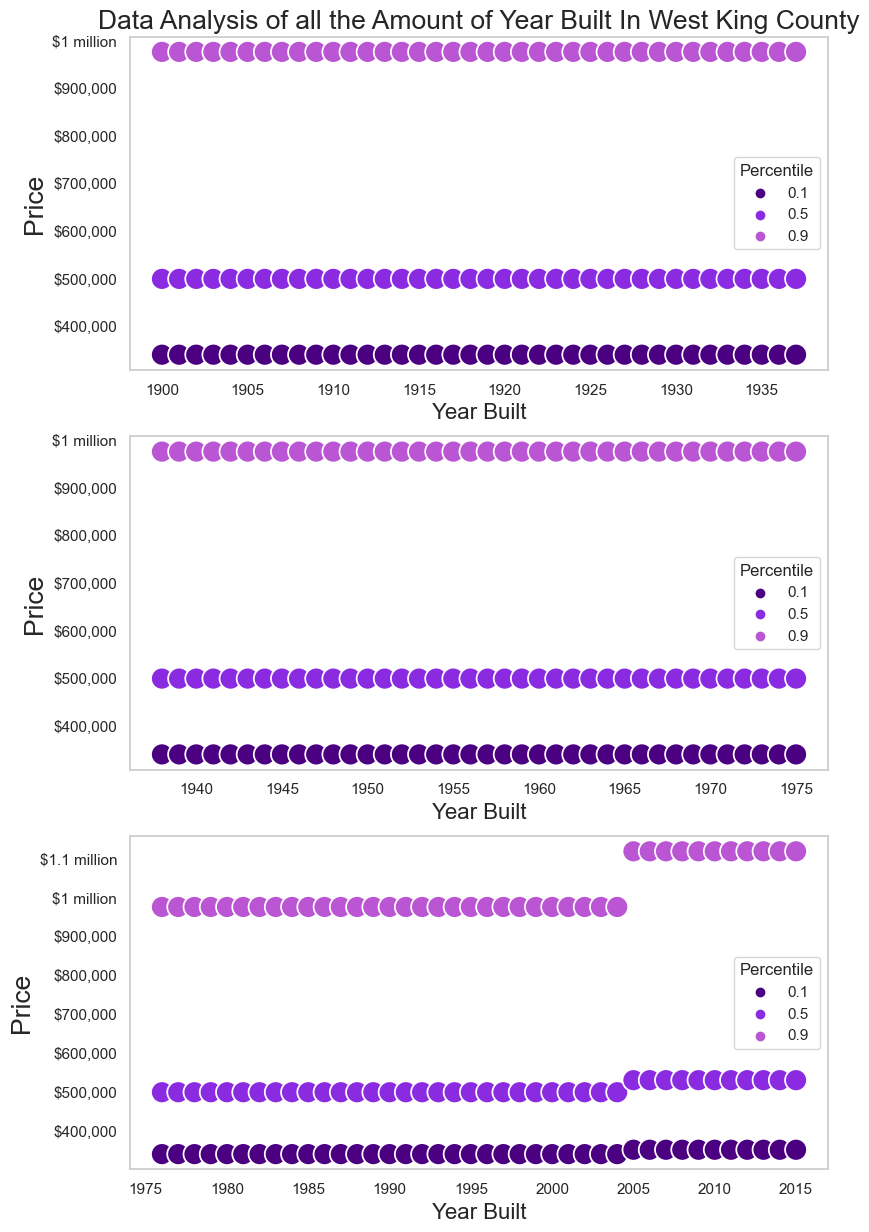

In [301]:
plt.subplot(3,1,1)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax =sns.scatterplot(data=melted_data1, x="Year_Built",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Amount of Year Built In West King County',size=19)
plt.xlabel("Year Built", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000', 
                    '$700,000','$800,000', '$900,000','$1 million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year Built")
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)


plt.subplot(3,1,2)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax =sns.scatterplot(data=melted_data2, x="Year_Built",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('Data Analysis of all the Amount of Year Built In South King County',size=19)
plt.xlabel("Year Built", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000',
                    '$700,000','$800,000', '$900,000','$1 million'])
xlabel = plt.xlabel("Year Built")
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)


plt.subplot(3,1,3)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax =sns.scatterplot(data=melted_data3, x="Year_Built",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('Data Analysis of all the Amount of Year Built In South King County',size=19)
plt.xlabel("Year Built", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000',
                    '$700,000','$800,000', '$900,000','$1 million','$1.1 million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year Built")
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)

<ipython-input-302-371bab5c474f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000',
<ipython-input-302-371bab5c474f>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000',
<ipython-input-302-371bab5c474f>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000',


[Text(0, 300000.0, '0'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '$900,000'),
 Text(0, 1000000.0, '$1 million'),
 Text(0, 1100000.0, '$1.1 million'),
 Text(0, 1200000.0, '')]

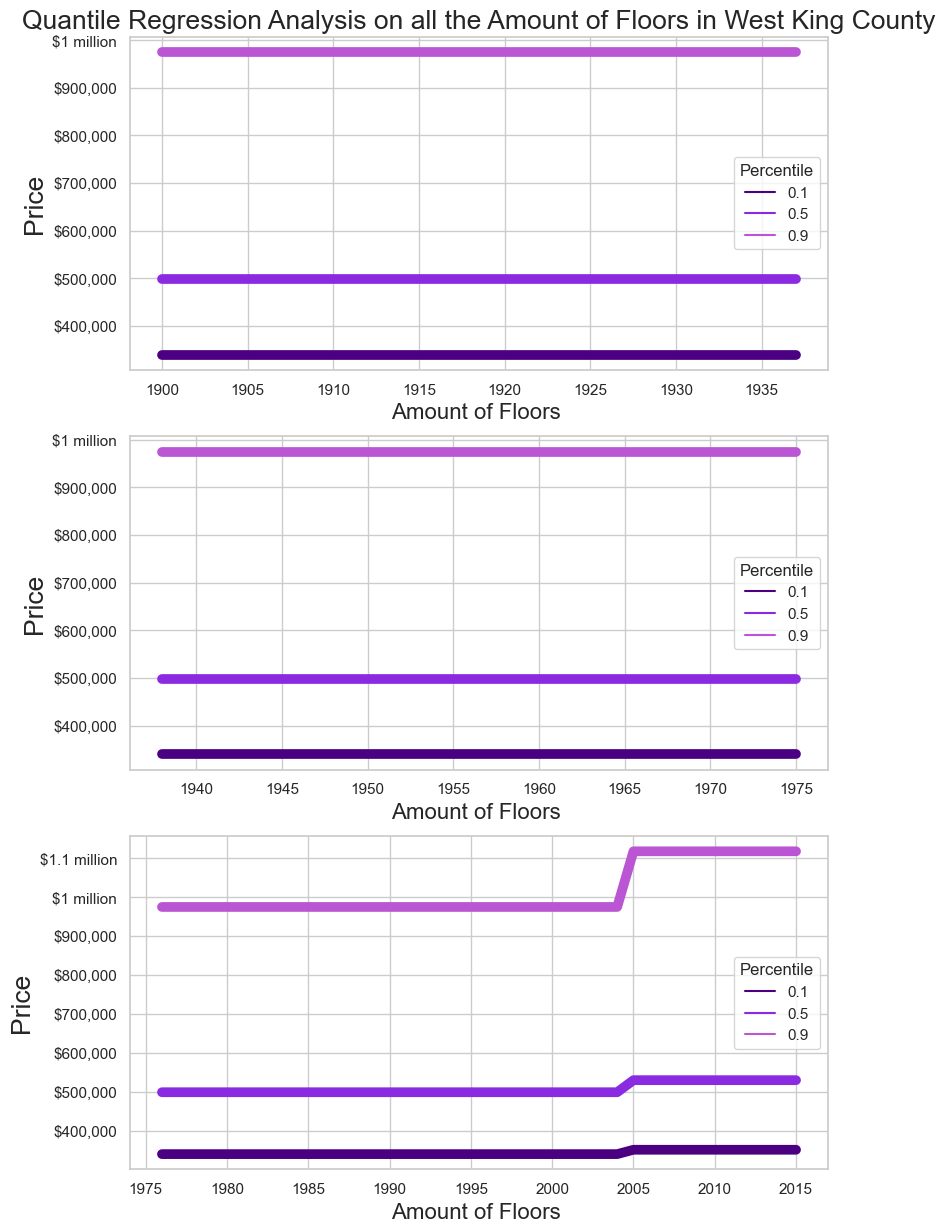

In [302]:
plt.subplot(3,1,1)
sns.set_style("whitegrid")
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax=sns.lineplot( data=melted_data1, x="Year_Built",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15) 
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Amount of Floors in West King County',size=19)
plt.xlabel("Amount of Floors ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000', 
                    '$700,000','$800,000', '$900,000','$1 million'])


plt.subplot(3,1,2)
sns.set_style("whitegrid")
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax=sns.lineplot(  data=melted_data2, x="Year_Built",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)  
plt.legend(title='Percentile')
plt.xlabel("Amount of Floors ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000',
                    '$700,000','$800,000', '$900,000','$1 million'])



plt.subplot(3,1,3)
sns.set_style("whitegrid")
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax=sns.lineplot( data=melted_data3, x="Year_Built",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
plt.xlabel("Amount of Floors ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000',
                    '$700,000','$800,000', '$900,000','$1 million','$1.1 million'])

In [303]:
(Quantile_regression3['Price'] > Quantile_regression3['0.1']).value_counts()

True     3536
False    1699
dtype: int64

In [306]:
i = 0
y= 0
x = []
while i < 3536:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1699:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [304]:
(Quantile_regression3['Price'] > Quantile_regression3['0.5']).value_counts()

False    3152
True     2083
dtype: int64

In [307]:
i = 0
y= 0
x = []
while i < 3152:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 2083:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [305]:
(Quantile_regression3['Price'] > Quantile_regression3['0.9']).value_counts()

False    4784
True      451
dtype: int64

In [308]:
i = 0
y= 0
x = []
while i < 4784:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 451:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

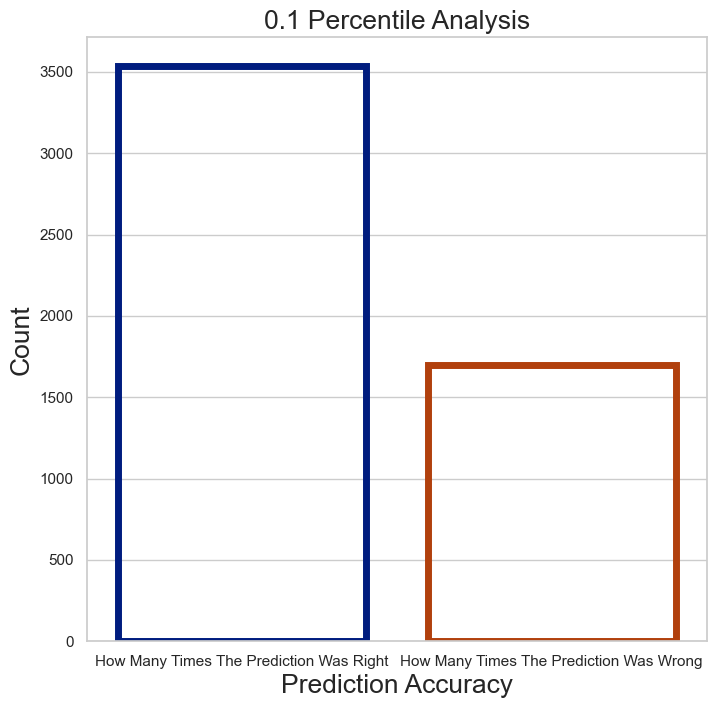

In [309]:
fig = plt.figure()
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

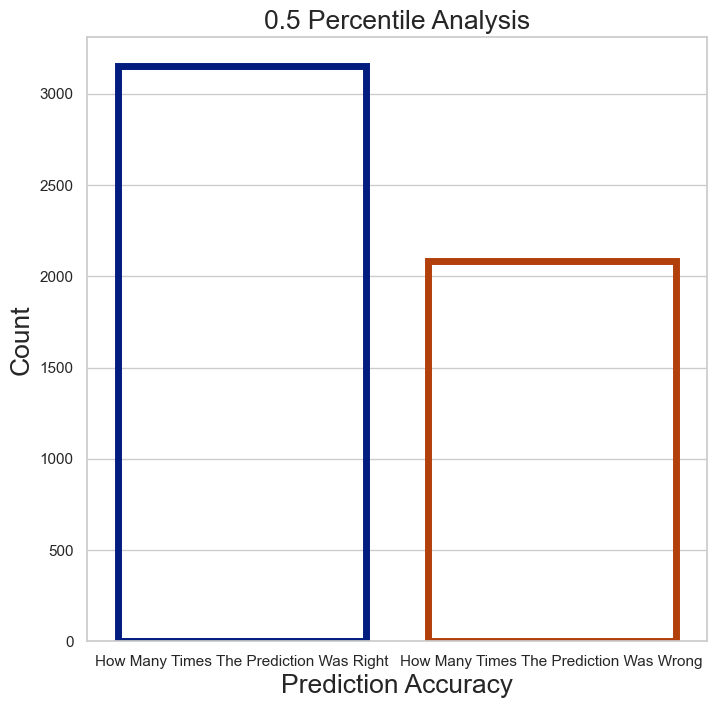

In [310]:
fig = plt.figure()
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

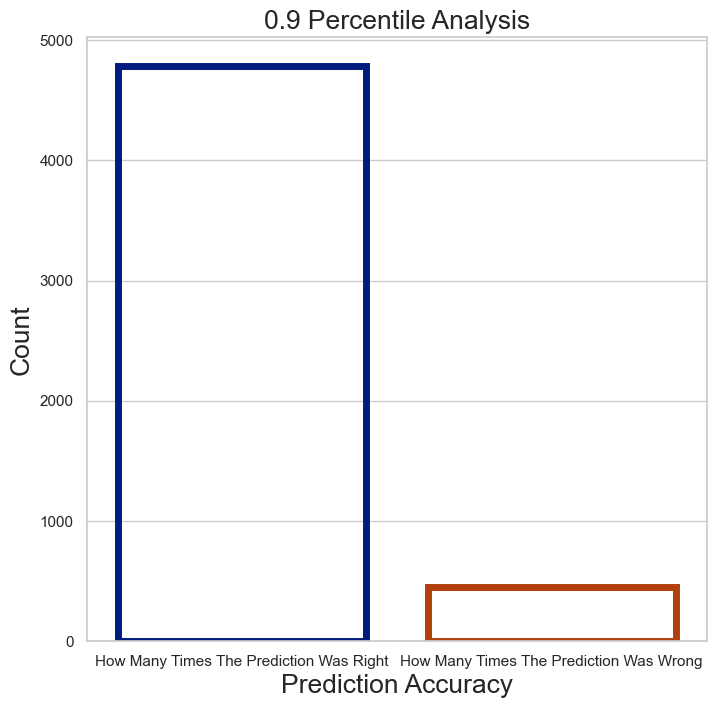

In [311]:
fig = plt.figure()
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [313]:
Predictions3 = []
for i in regressiondata4.Year_Built:
    if i == 1900:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1901:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1902:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1903:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1904:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1905:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1906:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1907:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1908:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1909:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1910:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1911:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1912:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1913:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1914:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1915:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1916:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1917:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1918:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1919:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1920:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1921:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1922:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1923:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1924:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1925:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1926:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1927:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1928:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1929:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1930:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1931:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1932:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1933:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1934:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1935:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1936:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1937:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1938:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1939:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1940:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1941:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1942:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1943:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1944:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1945:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1946:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1947:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1948:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1949:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1950:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1951:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1952:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1953:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1954:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1955:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1956:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1957:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1958:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1959:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1960:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1961:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1962:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1963:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1964:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1965:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1966:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1967:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1968:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1969:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1970:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1971:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1972:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1973:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1974:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1975:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1976:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1977:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1978:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1979:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1980:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1981:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1982:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1983:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1984:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1985:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1986:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1987:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1988:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1989:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1990:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1991:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1992:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1993:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1994:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1995:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1996:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1997:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1998:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1999:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 2000:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 2001:Predictions3.append('Between: $340,000 - $975,000')
    if i == 2002:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 2003:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 2004:Predictions3.append('Between: $340,000 - $975,000')
    if i == 2005:Predictions3.append('Between: $351,199- $1,117,997')
    if i == 2006:Predictions3.append('Between: $351,199- $1,117,997') 
    if i == 2007:Predictions3.append('Between: $351,199- $1,117,997')
    if i == 2008:Predictions3.append('Between: $351,199- $1,117,997') 
    if i == 2009:Predictions3.append('Between: $351,199- $1,117,997') 
    if i == 2010:Predictions3.append('Between: $351,199- $1,117,997') 
    if i == 2011:Predictions3.append('Between: $351,199- $1,117,997')
    if i == 2012:Predictions3.append('Between: $351,199- $1,117,997') 
    if i == 2013:Predictions3.append('Between: $351,199- $1,117,997') 
    if i == 2014:Predictions3.append('Between: $351,199- $1,117,997') 
    if i == 2015:Predictions3.append('Between: $351,199- $1,117,997')
len(Predictions3)

5816

In [314]:
price = []
for i in regressiondata4.Price:
    price.append("${:,.0f}".format(i))

In [315]:
Prediction3 = pd.DataFrame({'Year Built':regressiondata4.Year_Built,
                           'Prediction':Predictions3,'Actual Price':price})
Prediction3

,Year Built,Prediction,Actual Price
0,2014,"Between: $351,199- $1,117,997","$453,246"
1,2014,"Between: $351,199- $1,117,997","$559,950"
2,2014,"Between: $351,199- $1,117,997","$499,950"
3,2014,"Between: $351,199- $1,117,997","$866,500"
4,2014,"Between: $351,199- $1,117,997","$372,977"
...,...,...,...
5811,1934,"Between: $340,000 - $975,000","$272,000"
5812,1934,"Between: $340,000 - $975,000","$420,000"
5813,1934,"Between: $340,000 - $975,000","$230,000"
5814,1934,"Between: $340,000 - $975,000","$275,000"


In [319]:
def YEAR_RENOVATED(YEAR):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    year = house_info['Year Renoveted'].tolist()

    year_index = []
    for i,x in enumerate(year):
        if x == YEAR:year_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    year_westking = []
    for i in year_index:
        if locations[i] == zip_loca[0] : year_westking.append(i)
        elif locations[i] == zip_loca[1] : year_westking.append(i)
        elif locations[i] == zip_loca[2] : year_westking.append(i)
        elif locations[i] == zip_loca[3] : year_westking.append(i)
        elif locations[i] == zip_loca[4]: year_westking.append(i)
        elif locations[i] == zip_loca[5] : year_westking.append(i)
        elif locations[i] == zip_loca[6] : year_westking.append(i)
        elif locations[i] == zip_loca[7]: year_westking.append(i)
        elif locations[i] == zip_loca[8] : year_westking.append(i)
        elif locations[i] == zip_loca[9] : year_westking.append(i)
        elif locations[i] == zip_loca[10] : year_westking.append(i)
        elif locations[i] == zip_loca[11] : year_westking.append(i)
        elif locations[i] == zip_loca[12]: year_westking.append(i)
        elif locations[i] == zip_loca[13] : year_westking.append(i)
        elif locations[i] == zip_loca[14] : year_westking.append(i)
        elif locations[i] == zip_loca[15] : year_westking.append(i)
        elif locations[i] == zip_loca[16]: year_westking.append(i)
        elif locations[i] == zip_loca[17] : year_westking.append(i)
        elif locations[i] == zip_loca[18]: year_westking.append(i)
        elif locations[i] == zip_loca[19] : year_westking.append(i)
        elif locations[i] == zip_loca[20]: year_westking.append(i)
        elif locations[i] == zip_loca[21] : year_westking.append(i)
        elif locations[i] == zip_loca[22] : year_westking.append(i)
        elif locations[i] == zip_loca[23] : year_westking.append(i)
        elif locations[i] == zip_loca[24] : year_westking.append(i)
        elif locations[i] == zip_loca[25] : year_westking.append(i)
        elif locations[i] == zip_loca[26] : year_westking.append(i)
        elif locations[i] == zip_loca[27] : year_westking.append(i)
        elif locations[i] == zip_loca[28]: year_westking.append(i)
        elif locations[i] == zip_loca[29] : year_westking.append(i)
        elif locations[i] == zip_loca[30] : year_westking.append(i)
        elif locations[i] == zip_loca[31]: year_westking.append(i)
        elif locations[i] == zip_loca[32] : year_westking.append(i)
        elif locations[i] == zip_loca[33] : year_westking.append(i)
        elif locations[i] == zip_loca[34] : year_westking.append(i)

    price = house_info["Price"].tolist()

    price_westking = []
    for i in year_westking:price_westking.append(price[i])
    return(price_westking)

year_renovated = house_info["Year Renoveted"].value_counts().index.tolist()
yearrenov_Price_westking = []
for i in year_renovated:
    yearrenov_Price_westking.append(YEAR_RENOVATED(i))
yearrenov_Price_westking = sum(yearrenov_Price_westking, [])
len(yearrenov_Price_westking)

4796

In [320]:
def AMOUNT_YEAR_RENOVATED(AMOUNT_YEAR):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    year_renovated = house_info["Year Renoveted"].tolist()
    X_value = []
    year_index = []
    for i,x in enumerate(year_renovated):
        if x == AMOUNT_YEAR:year_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    for i in year_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_YEAR)
        
    return X_value
year = house_info["Year Renoveted"].value_counts().index.tolist()
year_westking = []
for i in year:
    year_westking.append(AMOUNT_YEAR_RENOVATED(i))
year_westking= sum(year_westking, [])
len(year_westking)

4796

In [337]:
regressiondata5 = pd.DataFrame({'Year_Renoveted':year_westking,
                                'Price':yearrenov_Price_westking})
regressiondata5[4574:]
re5 = regressiondata5[4574:]
re5
x = re5.Year_Renoveted.value_counts()
len(x)

50

In [339]:
flatui = ['#f7ddf2','#fae4f6','#fbdcf5','#fee7f9','#ffe6fa',
          '#eecde8','#f4d7ef','#f4d0ee','#f6c9ee','#f9c0ee',
          
          '#fdc7f3','#fcc1f2','#f9c6f0','#f6d0ef','#eabee2',
          '#fda2ed','#f8a0e8','#efa9e3','#e7a0da','#fc77e4',
          
          '#f68fe4','#ef92de','#e998da','#fb5ade','#f36fdb',
          '#f057d4','#e65ccd','#db64c6','#d066bd','#fb20d3',
          
          '#f123cb','#ee2acb','#e72dc5','#f104c6','#ef10c6',
          '#e906bf','#d011ad','#d220b1','#d229b3','#bb44a5',
          
          '#99037d','#a10b85','#780c65','#660c55','#641756',
          '#5a2650','#502248','#3e0534','#520243','#400335',
         ]
len(flatui)#50

50

<ipython-input-341-ae25a411df69>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',


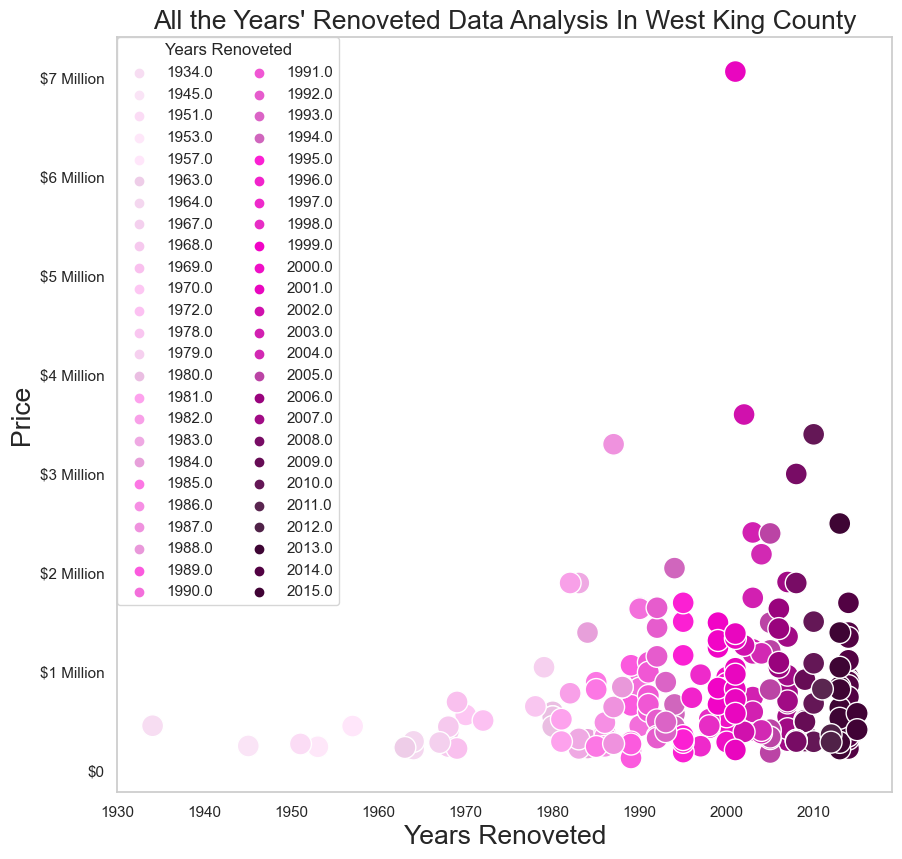

In [341]:
x = regressiondata5[4574:]['Year_Renoveted']
y = regressiondata5[4574:]['Price']
#plt.xticks(np.arange(1900,2000))
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=re5, x=x, y=y,s=250, linewidth = 1,
                    hue='Year_Renoveted',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Years\' Renoveted Data Analysis In West King County',size=19)
plt.xlabel("Years Renoveted", size=19)
plt.legend(title='Years Renoveted')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',
                         '$5 Million','$6 Million','$7 Million'])
plt.gcf().set_size_inches((10,10))
plt.legend( loc='upper left', borderaxespad=0,title="Years Renoveted",
          frameon=True, ncol=2)
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [342]:
train_df, test_df = train_test_split(regressiondata5, test_size=0.10, shuffle=False)

In [343]:
X_train, y_train = train_df[['Year_Renoveted']], train_df[['Price']]
X_test, y_test = test_df[['Year_Renoveted']], test_df[['Price']]

In [344]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [346]:
Quantile_regression4 = pd.DataFrame({'Year_Renoveted': X_test.reset_index()['Year_Renoveted'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [347]:
Quantile_regression4 = Quantile_regression4.drop(range(0,277))
Quantile_regression4

,Year_Renoveted,0.1,0.5,0.9,Price
277,2014.0,238950.0,439000.0,887549.9375,324950.0
278,2014.0,238950.0,439000.0,887549.9375,920000.0
279,2014.0,238950.0,439000.0,887549.9375,1400000.0
280,2014.0,238950.0,439000.0,887549.9375,575000.0
281,2014.0,238950.0,439000.0,887549.9375,550000.0
...,...,...,...,...,...
475,1957.0,238950.0,439000.0,887549.9375,456700.0
476,1967.0,238950.0,439000.0,887549.9375,290000.0
477,1953.0,238950.0,439000.0,887549.9375,247500.0
478,1951.0,238950.0,439000.0,887549.9375,276000.0


In [354]:
melted_data5 = pd.melt(Quantile_regression4, id_vars=['Year_Renoveted'])
melted_data5 = melted_data5.drop(range(609,812))
melted_data5 = melted_data5.rename(columns={'variable': 'Percentile'})
melted_data5

,Year_Renoveted,Percentile,value
0,2014.0,0.1,238950.0000
1,2014.0,0.1,238950.0000
2,2014.0,0.1,238950.0000
3,2014.0,0.1,238950.0000
4,2014.0,0.1,238950.0000
...,...,...,...
604,1957.0,0.9,887549.9375
605,1967.0,0.9,887549.9375
606,1953.0,0.9,887549.9375
607,1951.0,0.9,887549.9375


<ipython-input-356-602639058687>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000'])


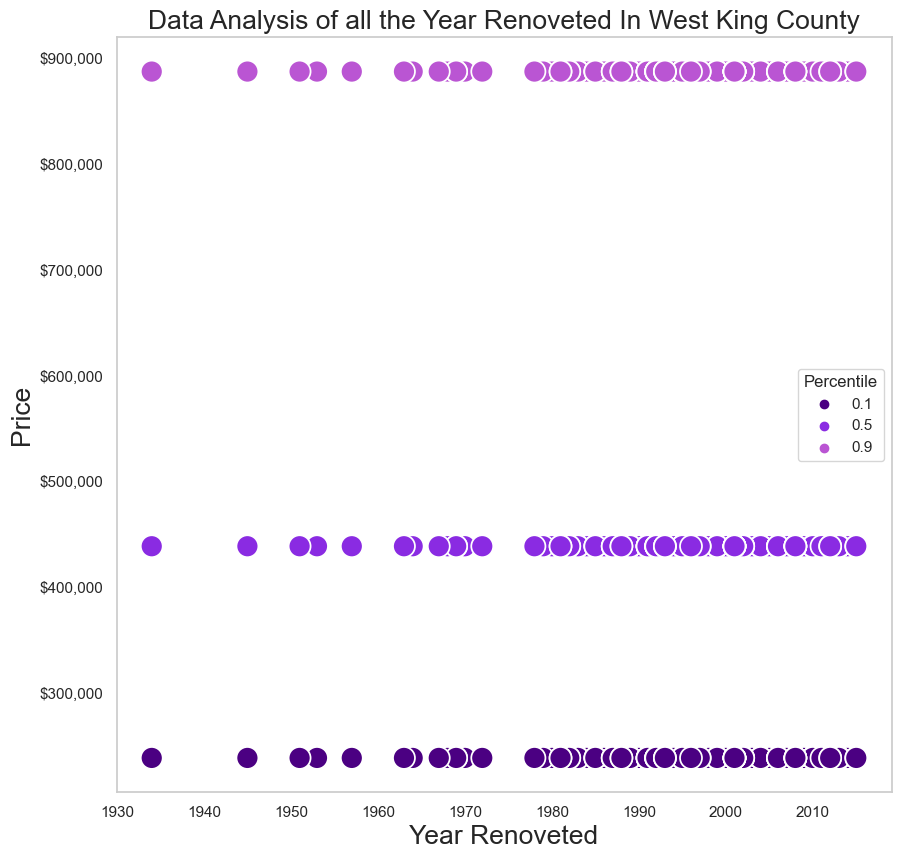

In [356]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax =sns.scatterplot(data=melted_data5, x="Year_Renoveted",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Year Renoveted In West King County',size=19)
plt.xlabel("Year Renoveted'", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year Renoveted")
plt.gcf().set_size_inches((10,10))

<ipython-input-357-8e28bbab9491>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000'])


[Text(0, 200000.0, '0'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '$900,000'),
 Text(0, 1000000.0, '')]

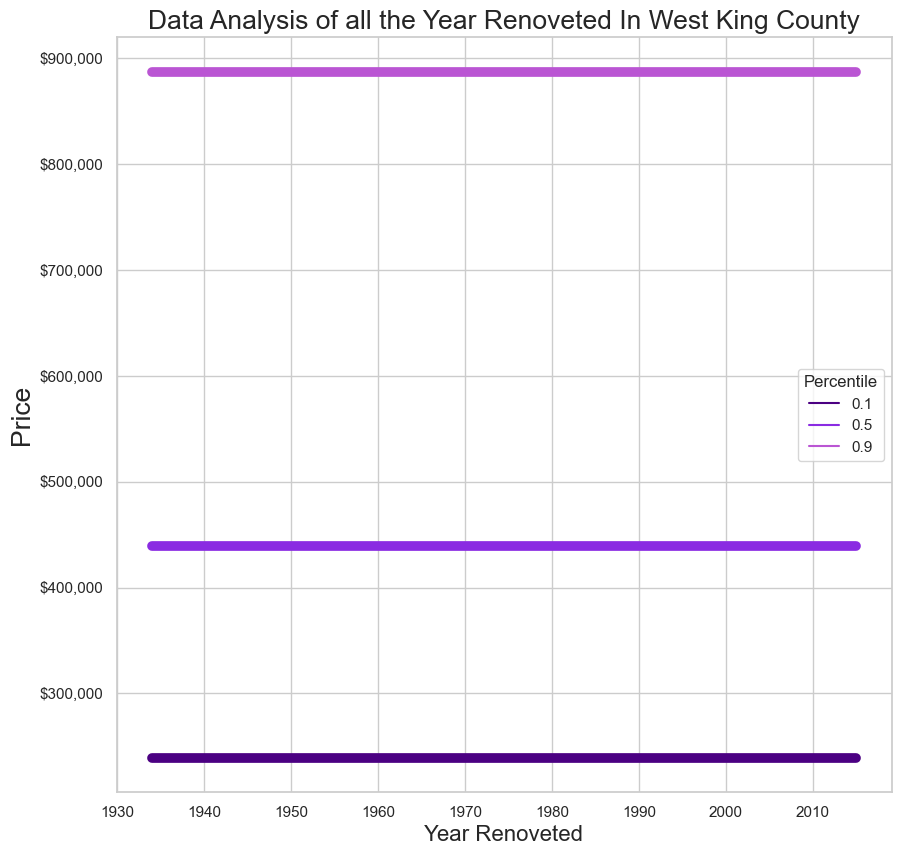

In [357]:
sns.set_style("whitegrid")
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax=sns.lineplot( data=melted_data5, x="Year_Renoveted",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
ax.set_title('Data Analysis of all the Year Renoveted In West King County',size=19)
plt.legend(title='Percentile')
plt.xlabel("Year Renoveted", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000'])

In [358]:
(Quantile_regression4['Price'] > Quantile_regression4['0.1']).value_counts()

True     192
False     11
dtype: int64

In [361]:
i = 0
y= 0
x = []
while i < 192:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 11:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [359]:
(Quantile_regression4['Price'] > Quantile_regression4['0.5']).value_counts()

True     138
False     65
dtype: int64

In [362]:
i = 0
y= 0
x = []
while i < 138:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 65:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [360]:
(Quantile_regression4['Price'] > Quantile_regression4['0.9']).value_counts()

False    140
True      63
dtype: int64

In [364]:
i = 0
y= 0
x = []
while i < 140:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 63:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

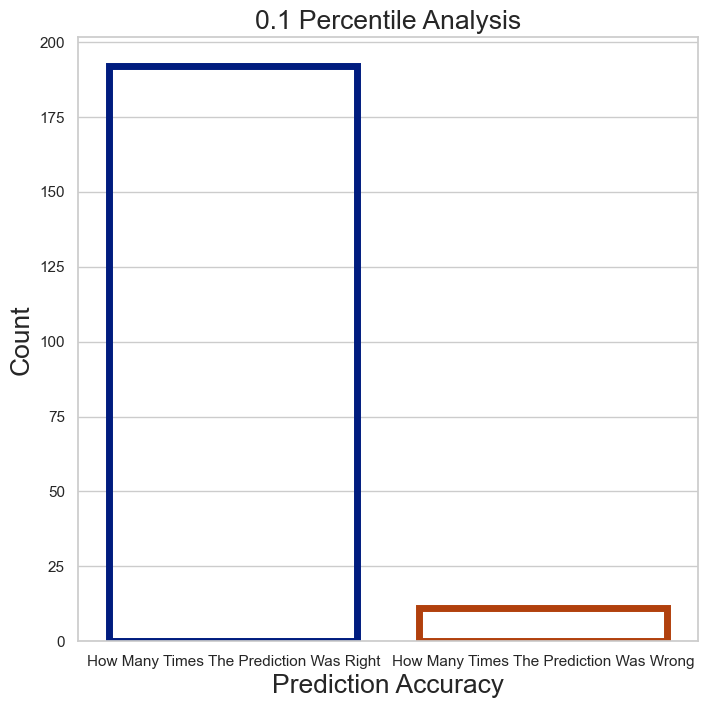

In [365]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

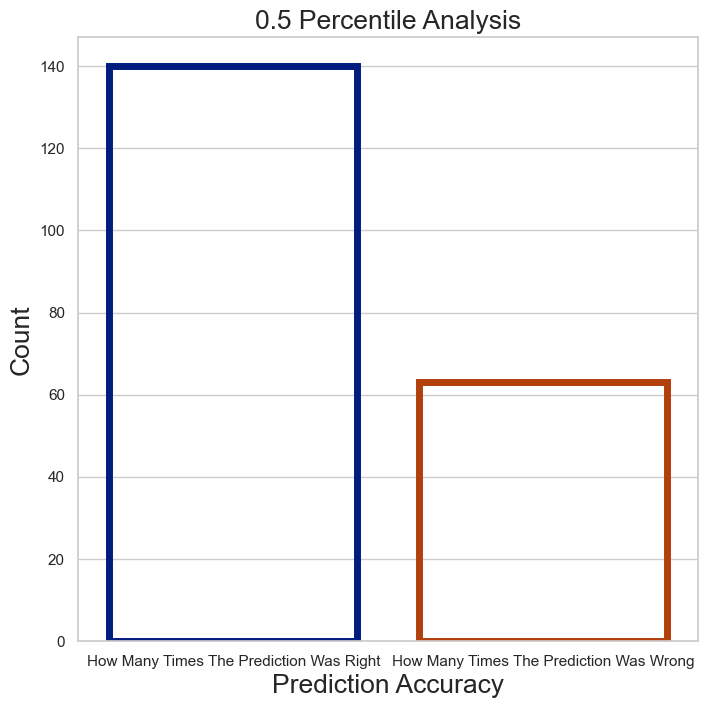

In [366]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

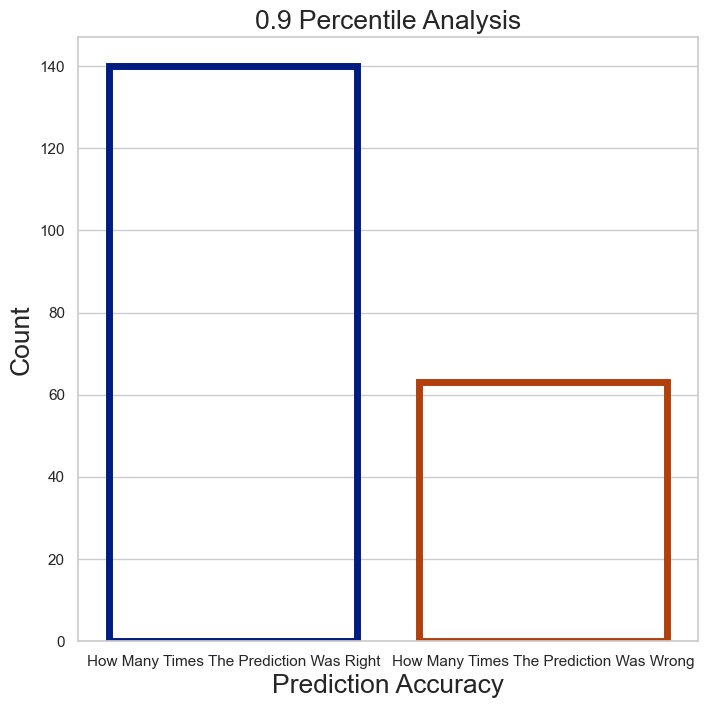

In [367]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [374]:
Predictions3 = []
for i in regressiondata5.Year_Renoveted:
    if i == 0:  Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1934:Predictions3.append('Between: $238,950 - $887,549')
    if i == 1945:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1950:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1951:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1952:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1953:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1954:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1955:Predictions3.append('Between: $238,950 - $887,549')
    if i == 1956:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1957:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1958:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1959:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1960:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1961:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1962:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1963:Predictions3.append('Between: $238,950 - $887,549')
    if i == 1964:Predictions3.append('Between: $238,950 - $887,549')
    if i == 1965:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1966:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1967:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1968:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1969:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1970:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1971:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1972:Predictions3.append('Between: $238,950 - $887,549')
    if i == 1973:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1974:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1975:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1976:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1977:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1978:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1979:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1980:Predictions3.append('Between: $238,950 - $887,549')
    if i == 1981:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1982:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1983:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1984:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1985:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1986:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1987:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1988:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1989:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1990:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1991:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1992:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1993:Predictions3.append('Between: $238,950 - $887,549')
    if i == 1994:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1995:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1996:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1997:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1998:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1999:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2000:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2001:Predictions3.append('Between: $238,950 - $887,549')
    if i == 2002:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2003:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2004:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2005:Predictions3.append('Between: $238,950 - $887,549')
    if i == 2006:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2007:Predictions3.append('Between: $238,950 - $887,549')
    if i == 2008:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2009:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2010:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2011:Predictions3.append('Between: $238,950 - $887,549')
    if i == 2012:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2013:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2014:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2015:Predictions3.append('Between: $238,950 - $887,549')
len(Predictions3)
#len(regressiondata5.Year_Renoveted)

4796

In [375]:
price = []
for i in regressiondata5.Price:
    price.append("${:,.0f}".format(i))

In [376]:
Prediction4 = pd.DataFrame({'Year Renoveted':regressiondata5.Year_Renoveted,
                           'Prediction':Predictions3,'Actual Price':price})
Prediction4

,Year Renoveted,Prediction,Actual Price
0,0.0,"Between: $238,950 - $887,549","$221,900"
1,0.0,"Between: $238,950 - $887,549","$510,000"
2,0.0,"Between: $238,950 - $887,549","$229,500"
3,0.0,"Between: $238,950 - $887,549","$400,000"
4,0.0,"Between: $238,950 - $887,549","$650,000"
...,...,...,...
4791,1957.0,"Between: $238,950 - $887,549","$456,700"
4792,1967.0,"Between: $238,950 - $887,549","$290,000"
4793,1953.0,"Between: $238,950 - $887,549","$247,500"
4794,1951.0,"Between: $238,950 - $887,549","$276,000"


In [381]:
def CONDITION(LEVEL_CONDITION):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    condition_level = house_info['Condition'].tolist()

    condition_index = []
    for i,x in enumerate(condition_level):
        if x == LEVEL_CONDITION:condition_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    level_westking = []
    for i  in condition_index:
        if locations[i] == zip_loca[0] : level_westking.append(i)
        elif locations[i] == zip_loca[1] : level_westking.append(i)
        elif locations[i] == zip_loca[2] : level_westking.append(i)
        elif locations[i] == zip_loca[3] : level_westking.append(i)
        elif locations[i] == zip_loca[4]: level_westking.append(i)
        elif locations[i] == zip_loca[5] : level_westking.append(i)
        elif locations[i] == zip_loca[6] : level_westking.append(i)
        elif locations[i] == zip_loca[7]: level_westking.append(i)
        elif locations[i] == zip_loca[8] : level_westking.append(i)
        elif locations[i] == zip_loca[9] : level_westking.append(i)
        elif locations[i] == zip_loca[10] : level_westking.append(i)
        elif locations[i] == zip_loca[11] : level_westking.append(i)
        elif locations[i] == zip_loca[12]: level_westking.append(i)
        elif locations[i] == zip_loca[13] : level_westking.append(i)
        elif locations[i] == zip_loca[14] : level_westking.append(i)
        elif locations[i] == zip_loca[15] : level_westking.append(i)
        elif locations[i] == zip_loca[16]: level_westking.append(i)
        elif locations[i] == zip_loca[17] : level_westking.append(i)
        elif locations[i] == zip_loca[18]: level_westking.append(i)
        elif locations[i] == zip_loca[19] : level_westking.append(i)
        elif locations[i] == zip_loca[20]: level_westking.append(i)
        elif locations[i] == zip_loca[21] : level_westking.append(i)
        elif locations[i] == zip_loca[22] : level_westking.append(i)
        elif locations[i] == zip_loca[23] : level_westking.append(i)
        elif locations[i] == zip_loca[24] : level_westking.append(i)
        elif locations[i] == zip_loca[25] : level_westking.append(i)
        elif locations[i] == zip_loca[26] : level_westking.append(i)
        elif locations[i] == zip_loca[27] : level_westking.append(i)
        elif locations[i] == zip_loca[28]: level_westking.append(i)
        elif locations[i] == zip_loca[29] : level_westking.append(i)
        elif locations[i] == zip_loca[30] : level_westking.append(i)
        elif locations[i] == zip_loca[31]: level_westking.append(i)
        elif locations[i] == zip_loca[32] : level_westking.append(i)
        elif locations[i] == zip_loca[33] : level_westking.append(i)
        elif locations[i] == zip_loca[34] : level_westking.append(i)
    
    price = house_info["Price"].tolist()

    price_westking = []
    for i in level_westking:price_westking.append(price[i])
    return(price_westking)

condition_level = house_info["Condition"].value_counts().index.tolist()
level_westking = []
for i in condition_level:
    level_westking.append(CONDITION(i))
level_westking= sum(level_westking, [])
len(level_westking)

5816

In [383]:
def AMOUNT_LEVEL(AMOUNT_LEVEL):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    condtions = house_info["Condition"].tolist()
    X_value = []
    level_index = []
    for i,x in enumerate(condtions):
        if x == AMOUNT_LEVEL:level_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    for i in level_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_LEVEL)
    return X_value
level = house_info["Condition"].value_counts().index.tolist()
condtition_level_westking = []
for i in level:
    condtition_level_westking.append(AMOUNT_LEVEL(i))
condtition_level_westking= sum(condtition_level_westking, [])
len(condtition_level_westking)

5816

In [384]:
regressiondata6 = pd.DataFrame({'Condition_Level':condtition_level_westking,
                                'Price':level_westking})
regressiondata6

,Condition_Level,Price
0,3,221900.0
1,3,510000.0
2,3,229500.0
3,3,650000.0
4,3,322500.0
...,...,...
5811,1,235000.0
5812,1,81000.0
5813,1,427000.0
5814,1,575000.0


<ipython-input-392-09d3a70c4d1b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',


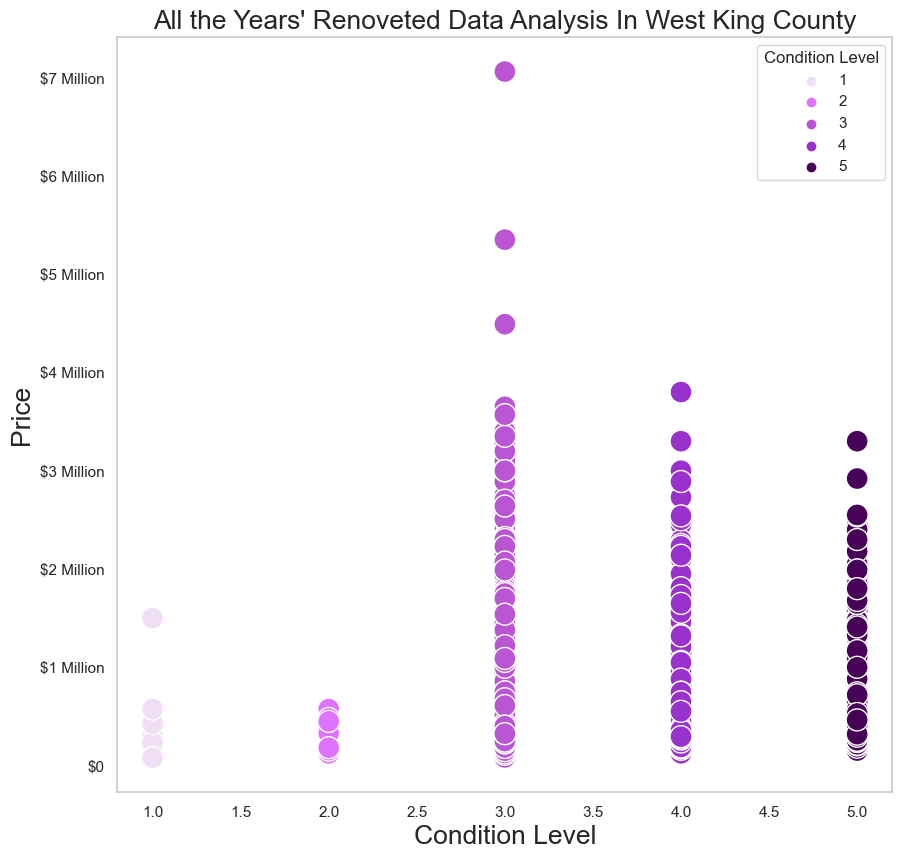

In [392]:
flatui = ['#F0DEF5','#df73ff','#ba55d3','#9932cc','#470258']

x = regressiondata6['Condition_Level']
y = regressiondata6['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata6, x=x, y=y,s=250, linewidth = 1,
                    hue='Condition_Level',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Years\' Renoveted Data Analysis In West King County',size=19)
plt.xlabel("Condition Level", size=19)
plt.legend(title='Condition Level')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',
                         '$5 Million','$6 Million','$7 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [393]:
train_df, test_df = train_test_split(regressiondata6, test_size=0.10, shuffle=False)

In [394]:
X_train, y_train = train_df[['Condition_Level']], train_df[['Price']]
X_test, y_test = test_df[['Condition_Level']], test_df[['Price']]

In [395]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [396]:
Quantile_regression5 = pd.DataFrame({'Condition_Level': X_test.reset_index()['Condition_Level'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})
Quantile_regression5

,Condition_Level,0.1,0.5,0.9,Price
0,4,247899.939416,419000.823403,944149.199855,180000.0
1,4,247899.939416,419000.823403,944149.199855,813000.0
2,4,247899.939416,419000.823403,944149.199855,1050000.0
3,4,247899.939416,419000.823403,944149.199855,325000.0
4,4,247899.939416,419000.823403,944149.199855,675000.0
...,...,...,...,...,...
577,1,244000.018592,459997.234452,915000.132807,235000.0
578,1,244000.018592,459997.234452,915000.132807,81000.0
579,1,244000.018592,459997.234452,915000.132807,427000.0
580,1,244000.018592,459997.234452,915000.132807,575000.0


In [407]:
row_df = pd.DataFrame({'Condition_Level':[3],'0.1':[244000.018592],'0.5':[459997.234452],
                       '0.9':[915000.132807]
                       ,'Price':[0]})
Quantile_regression5 = pd.concat([row_df, Quantile_regression5], ignore_index=True)
Quantile_regression5

,Condition_Level,0.1,0.5,0.9,Price
0,3,244000.018592,459997.234452,915000.132807,0.0
1,4,247899.939416,419000.823403,944149.199855,180000.0
2,4,247899.939416,419000.823403,944149.199855,813000.0
3,4,247899.939416,419000.823403,944149.199855,1050000.0
4,4,247899.939416,419000.823403,944149.199855,325000.0
...,...,...,...,...,...
578,1,244000.018592,459997.234452,915000.132807,235000.0
579,1,244000.018592,459997.234452,915000.132807,81000.0
580,1,244000.018592,459997.234452,915000.132807,427000.0
581,1,244000.018592,459997.234452,915000.132807,575000.0


In [412]:
melted_data6 = pd.melt(Quantile_regression5, id_vars=['Condition_Level'])
melted_data6 = melted_data6.drop(range(1749,2332))
melted_data6 = melted_data6.rename(columns={'variable': 'Percentile'})
melted_data6

,Condition_Level,Percentile,value
0,3,0.1,244000.018592
1,4,0.1,247899.939416
2,4,0.1,247899.939416
3,4,0.1,247899.939416
4,4,0.1,247899.939416
...,...,...,...
1744,1,0.9,915000.132807
1745,1,0.9,915000.132807
1746,1,0.9,915000.132807
1747,1,0.9,915000.132807


<ipython-input-415-927022b9b05d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000',


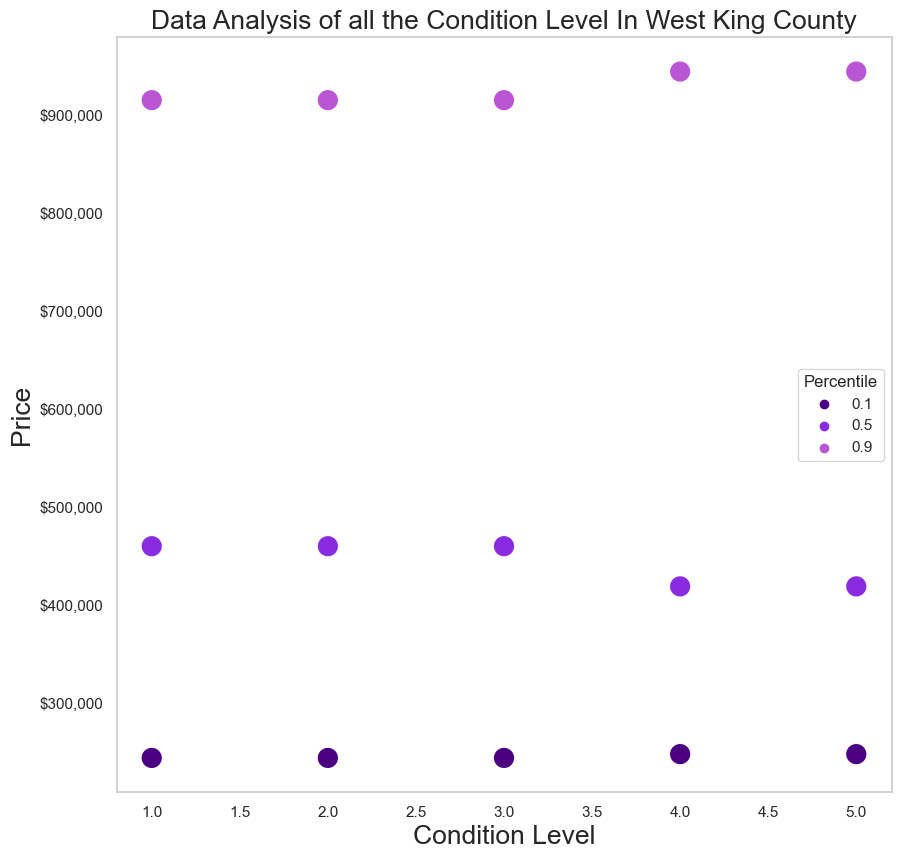

In [415]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax =sns.scatterplot(data=melted_data6, x="Condition_Level",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Condition Level In West King County',size=19)
plt.xlabel("Condition Level", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000',
                    '$900,000'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Condition Level")
plt.gcf().set_size_inches((10,10))

<ipython-input-416-71cd77e1c102>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000',


[Text(0, 200000.0, '0'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '$900,000'),
 Text(0, 1000000.0, '')]

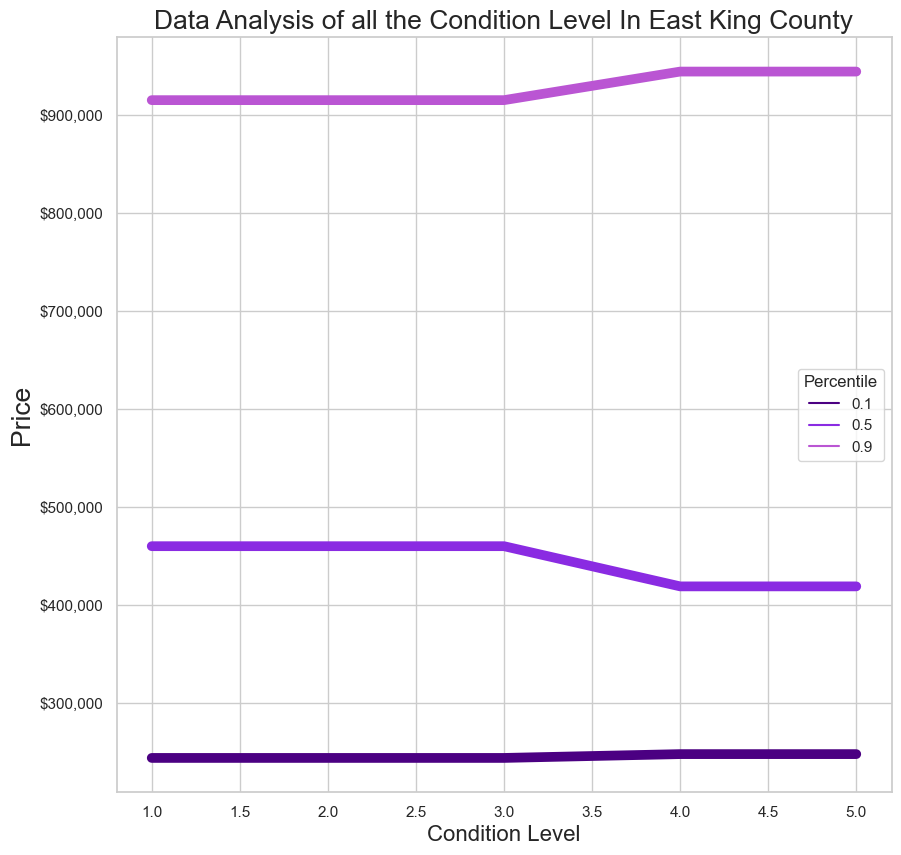

In [416]:
sns.set_style("whitegrid")
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax=sns.lineplot( data=melted_data6, x="Condition_Level",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
ax.set_title('Data Analysis of all the Condition Level In East King County',size=19)
plt.legend(title='Percentile')
plt.xlabel("Condition Level", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000',
                    '$900,000'])

In [417]:
(Quantile_regression5['Price'] > Quantile_regression5['0.1']).value_counts()

True     503
False     80
dtype: int64

In [427]:
i = 0
y= 0
x = []
while i < 503:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 80:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [428]:
(Quantile_regression5['Price'] > Quantile_regression5['0.5']).value_counts()

False    304
True     279
dtype: int64

In [429]:
i = 0
y= 0
x = []
while i < 304:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 279:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [430]:
(Quantile_regression5['Price'] > Quantile_regression5['0.9']).value_counts()

False    515
True      68
dtype: int64

In [431]:
i = 0
y= 0
x = []
while i < 515:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 68:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

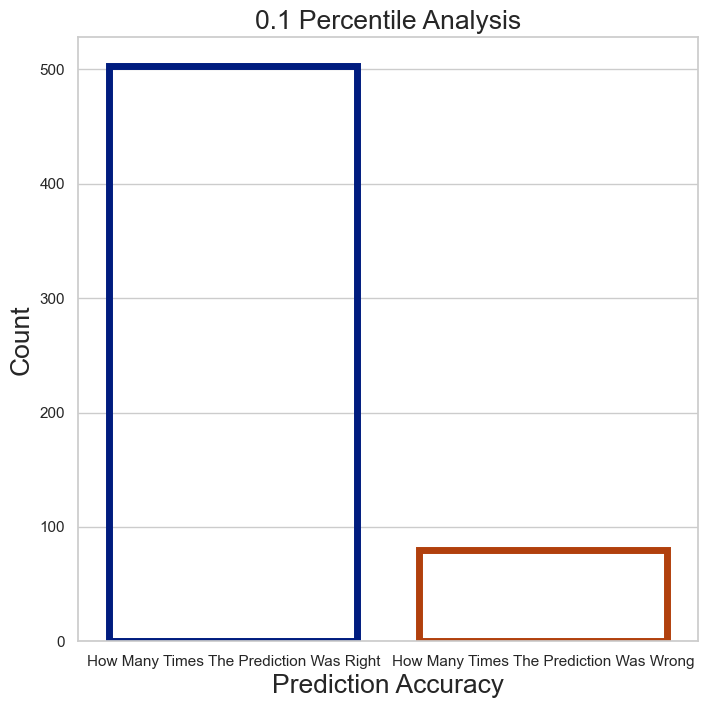

In [432]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

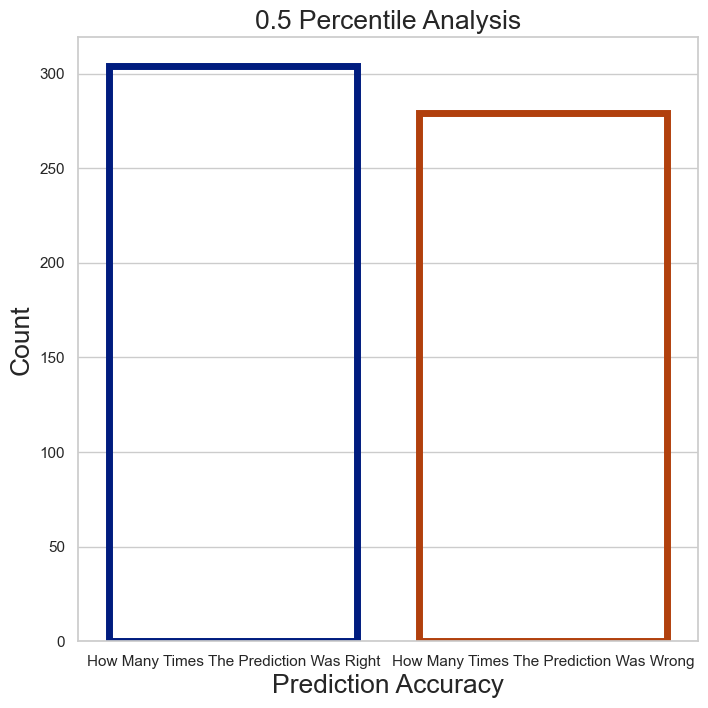

In [433]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

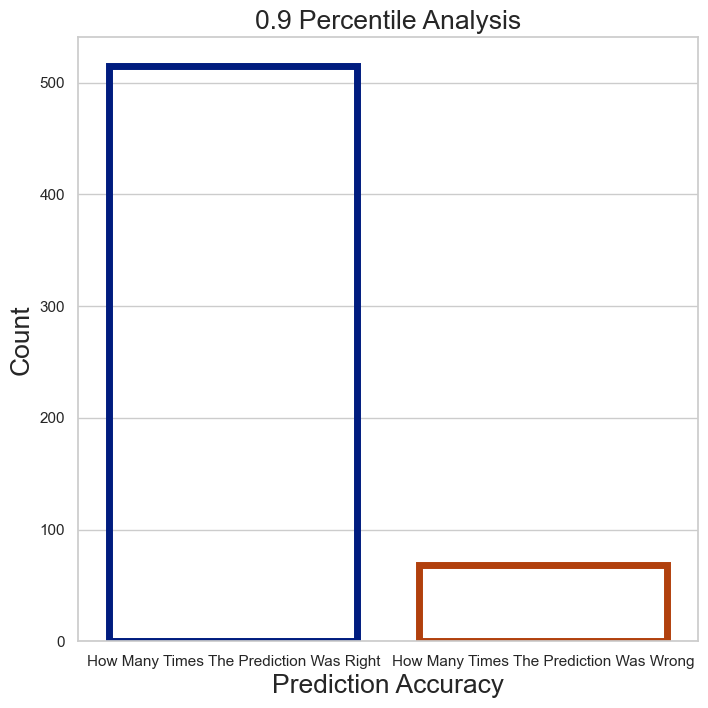

In [434]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [435]:
Predictions5 = []
for i in regressiondata6.Condition_Level:
    if i == 1:Predictions5.append('Between: $244,000 - $915,000') 
    if i == 2:Predictions5.append('Between: $244,000 - $915,000') 
    if i == 3:Predictions5.append('Between: $244,000 - $915,000')
    if i == 4:Predictions5.append('Between: $247,899 - $944,149') 
    if i == 5: Predictions5.append('Between: $247,899 - $944,149')
len(Predictions5)

5816

In [436]:
price = []
for i in regressiondata6.Price:
    price.append("${:,.0f}".format(i))

In [437]:
Prediction5 = pd.DataFrame({'Condition Level':regressiondata6.Condition_Level,
                           'Prediction':Predictions5,'Actual Price':price})
Prediction5

,Condition Level,Prediction,Actual Price
0,3,"Between: $244,000 - $915,000","$221,900"
1,3,"Between: $244,000 - $915,000","$510,000"
2,3,"Between: $244,000 - $915,000","$229,500"
3,3,"Between: $244,000 - $915,000","$650,000"
4,3,"Between: $244,000 - $915,000","$322,500"
...,...,...,...
5811,1,"Between: $244,000 - $915,000","$235,000"
5812,1,"Between: $244,000 - $915,000","$81,000"
5813,1,"Between: $244,000 - $915,000","$427,000"
5814,1,"Between: $244,000 - $915,000","$575,000"
